In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import re

    from sklearn.model_selection import train_test_split
    from sklearn.cluster import KMeans

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 100)
    import warnings
    warnings.filterwarnings("ignore")

In \[2\]:

    import os
    os.chdir('/Users/dharmigala/Desktop/UChicago/Autumn22/DS for Consulting/')

In \[3\]:

    ecom = pd.read_excel("Final Assignment - Week 9.xlsx")
    ecom.head()

Out\[3\]:

|     | id   | logtarg | r    | f   | m          | tof  | Ffiction1 | Fclassics3 | Fcartoons5 | Flegends6 | Fphilosophy7 | Freligion8 | Fpsychology9 | Flinguistics10 | Fart12 | Fmusic14 | Ffacsimile17 | Fhistory19 | Fconthist20 | Feconomy21 | Fpolitics22 | Fscience23 | Fcompsci26 | Frailroads27 | Fmaps30 | Ftravelguides31 | Fhealth35 | Fcooking36 | Flearning37 | FGamesRiddles38 | Fsports39 | Fhobby40 | Fnature41 | Fencyclopaedia44 | Fvideos50 | Fnonbooks99 | Mfiction1 | Mclassics3 | Mcartoons5 | Mlegends6 | Mphilosophy7 | Mreligion8 | Mpsychology9 | Mlinguistics10 | Mart12    | Mmusic14  | Mfacsimile17 | Mhistory19 | Mconthist20 | Meconomy21 | Mpolitics22 | Mscience23 | Mcompsci26 | Mrailroads27 | Mmaps30 | Mtravelguides31 | Mhealth35 | Mcooking36 | Mlearning37 | MGamesRiddles38 | Msports39 | Mhobby40  | Mnature41 | Mencyclopaedia44 | Mvideos50 | Mnonbooks99 | Unnamed: 66 | Unnamed: 67 | Dear Greg,                                        |
|-----|------|---------|------|-----|------------|------|-----------|------------|------------|-----------|--------------|------------|--------------|----------------|--------|----------|--------------|------------|-------------|------------|-------------|------------|------------|--------------|---------|-----------------|-----------|------------|-------------|-----------------|-----------|----------|-----------|------------------|-----------|-------------|-----------|------------|------------|-----------|--------------|------------|--------------|----------------|-----------|-----------|--------------|------------|-------------|------------|-------------|------------|------------|--------------|---------|-----------------|-----------|------------|-------------|-----------------|-----------|-----------|-----------|------------------|-----------|-------------|-------------|-------------|---------------------------------------------------|
| 0   | 914  | NaN     | 194  | 7   | 318.894775 | 1703 | 1         | 0          | 1          | 0         | 0            | 0          | 0            | 0              | 1      | 7        | 0            | 0          | 17          | 0          | 0           | 0          | 0          | 0            | 0       | 2               | 2         | 1          | 0           | 0               | 0         | 0        | 0         | 0                | 0         | 0           | 5.949997  | 0.0        | 7.643810   | 0.0       | 0.00000      | 0.000000   | 0.0          | 0.000000       | 8.589699  | 61.429962 | 0.0          | 0.000000   | 197.935547  | 0.000000   | 0.0         | 0.000000   | 0.000000   | 0.000000     | 0.0     | 12.271004       | 14.899994 | 10.174706  | 0.000000    | 0.0             | 0.0       | 0.000000  | 0.000000  | 0.0              | 0.000000  | 0.0         | NaN         | NaN         | NaN                                               |
| 1   | 957  | NaN     | 3    | 14  | 368.052246 | 2364 | 1         | 0          | 2          | 0         | 0            | 0          | 0            | 0              | 0      | 4        | 0            | 4          | 4           | 0          | 0           | 0          | 1          | 0            | 0       | 0               | 7         | 0          | 4           | 0               | 0         | 4        | 2         | 1                | 0         | 0           | 12.680038 | 0.0        | 20.236496  | 0.0       | 0.00000      | 0.000000   | 0.0          | 0.000000       | 0.000000  | 29.414169 | 0.0          | 53.839020  | 60.749969   | 0.000000   | 0.0         | 0.000000   | 5.899998   | 0.000000     | 0.0     | 0.000000        | 74.156250 | 0.000000   | 22.749985   | 0.0             | 0.0       | 61.176025 | 17.150269 | 10.0             | 0.000000  | 0.0         | NaN         | NaN         | I wanted to find something that the students c... |
| 2   | 1406 | NaN     | 1489 | 15  | 423.298340 | 2371 | 0         | 0          | 0          | 0         | 0            | 0          | 0            | 0              | 0      | 0        | 0            | 1          | 34          | 0          | 0           | 0          | 0          | 0            | 0       | 0               | 0         | 0          | 0           | 0               | 0         | 0        | 0         | 0                | 0         | 0           | 0.000000  | 0.0        | 0.000000   | 0.0       | 0.00000      | 0.000000   | 0.0          | 0.000000       | 0.000000  | 0.000000  | 0.0          | 10.123573  | 413.174805  | 0.000000   | 0.0         | 0.000000   | 0.000000   | 0.000000     | 0.0     | 0.000000        | 0.000000  | 0.000000   | 0.000000    | 0.0             | 0.0       | 0.000000  | 0.000000  | 0.0              | 0.000000  | 0.0         | NaN         | NaN         | NaN                                               |
| 3   | 1414 | NaN     | 155  | 4   | 71.217041  | 1290 | 0         | 0          | 0          | 0         | 0            | 0          | 0            | 0              | 0      | 0        | 0            | 0          | 7           | 0          | 0           | 0          | 0          | 0            | 0       | 0               | 0         | 0          | 0           | 0               | 0         | 0        | 0         | 0                | 0         | 0           | 0.000000  | 0.0        | 0.000000   | 0.0       | 0.00000      | 0.000000   | 0.0          | 0.000000       | 0.000000  | 0.000000  | 0.0          | 0.000000   | 71.217041   | 0.000000   | 0.0         | 0.000000   | 0.000000   | 0.000000     | 0.0     | 0.000000        | 0.000000  | 0.000000   | 0.000000    | 0.0             | 0.0       | 0.000000  | 0.000000  | 0.0              | 0.000000  | 0.0         | NaN         | NaN         | I have data from American Science and Surplus,... |
| 4   | 1546 | NaN     | 194  | 6   | 442.638184 | 2188 | 0         | 0          | 1          | 0         | 3            | 1          | 0            | 1              | 1      | 3        | 0            | 6          | 7           | 1          | 0           | 2          | 0          | 2            | 0       | 1               | 3         | 0          | 2           | 0               | 0         | 2        | 0         | 0                | 3         | 0           | 0.000000  | 0.0        | 8.899994   | 0.0       | 26.19841     | 19.899994  | 0.0          | 6.621227       | 15.313187 | 39.804047 | 0.0          | 64.744934  | 86.945740   | 5.112919   | 0.0         | 19.849991  | 0.000000   | 9.960655     | 0.0     | 10.123573       | 41.518219 | 0.000000   | 7.949997    | 0.0             | 0.0       | 17.895203 | 0.000000  | 0.0              | 61.799988 | 0.0         | NaN         | NaN         | NaN                                               |

# 1. Perform descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)<a href="#1.-Perform-descriptive-statistics-on-all-variables-to-help-understand-the-data,-the-distributions-and-basic-info-you-have-to-work-with-on-this-challenge.-(Mean,-Standard-Deviation,-Median,-Min,-Max-and-Histogram)" class="anchor-link">¶</a>

In \[4\]:

    ecom.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 33713 entries, 0 to 33712
    Data columns (total 69 columns):
     #   Column            Non-Null Count  Dtype  
    ---  ------            --------------  -----  
     0   id                33713 non-null  int64  
     1   logtarg           8311 non-null   float64
     2   r                 33713 non-null  int64  
     3   f                 33713 non-null  int64  
     4   m                 33713 non-null  float64
     5   tof               33713 non-null  int64  
     6   Ffiction1         33713 non-null  int64  
     7   Fclassics3        33713 non-null  int64  
     8   Fcartoons5        33713 non-null  int64  
     9   Flegends6         33713 non-null  int64  
     10  Fphilosophy7      33713 non-null  int64  
     11  Freligion8        33713 non-null  int64  
     12  Fpsychology9      33713 non-null  int64  
     13  Flinguistics10    33713 non-null  int64  
     14  Fart12            33713 non-null  int64  
     15  Fmusic14          33713 non-null  int64  
     16  Ffacsimile17      33713 non-null  int64  
     17  Fhistory19        33713 non-null  int64  
     18  Fconthist20       33713 non-null  int64  
     19  Feconomy21        33713 non-null  int64  
     20  Fpolitics22       33713 non-null  int64  
     21  Fscience23        33713 non-null  int64  
     22  Fcompsci26        33713 non-null  int64  
     23  Frailroads27      33713 non-null  int64  
     24  Fmaps30           33713 non-null  int64  
     25  Ftravelguides31   33713 non-null  int64  
     26  Fhealth35         33713 non-null  int64  
     27  Fcooking36        33713 non-null  int64  
     28  Flearning37       33713 non-null  int64  
     29  FGamesRiddles38   33713 non-null  int64  
     30  Fsports39         33713 non-null  int64  
     31  Fhobby40          33713 non-null  int64  
     32  Fnature41         33713 non-null  int64  
     33  Fencyclopaedia44  33713 non-null  int64  
     34  Fvideos50         33713 non-null  int64  
     35  Fnonbooks99       33713 non-null  int64  
     36  Mfiction1         33713 non-null  float64
     37  Mclassics3        33713 non-null  float64
     38  Mcartoons5        33713 non-null  float64
     39  Mlegends6         33713 non-null  float64
     40  Mphilosophy7      33713 non-null  float64
     41  Mreligion8        33713 non-null  float64
     42  Mpsychology9      33713 non-null  float64
     43  Mlinguistics10    33713 non-null  float64
     44  Mart12            33713 non-null  float64
     45  Mmusic14          33713 non-null  float64
     46  Mfacsimile17      33713 non-null  float64
     47  Mhistory19        33713 non-null  float64
     48  Mconthist20       33713 non-null  float64
     49  Meconomy21        33713 non-null  float64
     50  Mpolitics22       33713 non-null  float64
     51  Mscience23        33713 non-null  float64
     52  Mcompsci26        33713 non-null  float64
     53  Mrailroads27      33713 non-null  float64
     54  Mmaps30           33713 non-null  float64
     55  Mtravelguides31   33713 non-null  float64
     56  Mhealth35         33713 non-null  float64
     57  Mcooking36        33713 non-null  float64
     58  Mlearning37       33713 non-null  float64
     59  MGamesRiddles38   33713 non-null  float64
     60  Msports39         33713 non-null  float64
     61  Mhobby40          33713 non-null  float64
     62  Mnature41         33713 non-null  float64
     63  Mencyclopaedia44  33713 non-null  float64
     64  Mvideos50         33713 non-null  float64
     65  Mnonbooks99       33713 non-null  float64
     66  Unnamed: 66       0 non-null      float64
     67  Unnamed: 67       0 non-null      float64
     68  Dear Greg,        4 non-null      object 
    dtypes: float64(34), int64(34), object(1)
    memory usage: 17.7+ MB

In \[5\]:

    ecom.describe()
    #33713 records
    # r = recency, smaller number is most recent
    # f = frequency, higher number is more shopped
    # m = monetary, more $ spent
    # tof = time on file, higher number is longer customer

    # F_ are count variables
    # M_ are amount in $$ 

    # what is logtarg (Log of target var??)

    ## Each row is an individual customer

Out\[5\]:

|       | id           | logtarg     | r            | f            | m             | tof          | Ffiction1    | Fclassics3   | Fcartoons5   | Flegends6    | Fphilosophy7 | Freligion8   | Fpsychology9 | Flinguistics10 | Fart12       | Fmusic14     | Ffacsimile17 | Fhistory19   | Fconthist20  | Feconomy21   | Fpolitics22  | Fscience23   | Fcompsci26   | Frailroads27 | Fmaps30      | Ftravelguides31 | Fhealth35    | Fcooking36   | Flearning37 | FGamesRiddles38 | Fsports39    | Fhobby40     | Fnature41    | Fencyclopaedia44 | Fvideos50    | Fnonbooks99  | Mfiction1    | Mclassics3   | Mcartoons5   | Mlegends6    | Mphilosophy7 | Mreligion8    | Mpsychology9 | Mlinguistics10 | Mart12       | Mmusic14      | Mfacsimile17 | Mhistory19   | Mconthist20  | Meconomy21   | Mpolitics22  | Mscience23   | Mcompsci26   | Mrailroads27 | Mmaps30      | Mtravelguides31 | Mhealth35     | Mcooking36   | Mlearning37   | MGamesRiddles38 | Msports39    | Mhobby40     | Mnature41    | Mencyclopaedia44 | Mvideos50    | Mnonbooks99  | Unnamed: 66 | Unnamed: 67 |
|-------|--------------|-------------|--------------|--------------|---------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|----------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-----------------|--------------|--------------|-------------|-----------------|--------------|--------------|--------------|------------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|---------------|--------------|----------------|--------------|---------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-----------------|---------------|--------------|---------------|-----------------|--------------|--------------|--------------|------------------|--------------|--------------|-------------|-------------|
| count | 3.371300e+04 | 8311.000000 | 33713.000000 | 33713.000000 | 33713.000000  | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000   | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000    | 33713.000000 | 33713.000000 | 33713.00000 | 33713.000000    | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000     | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000  | 33713.000000 | 33713.000000   | 33713.000000 | 33713.000000  | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000    | 33713.000000  | 33713.000000 | 33713.000000  | 33713.000000    | 33713.000000 | 33713.000000 | 33713.000000 | 33713.000000     | 33713.000000 | 33713.000000 | 0.0         | 0.0         |
| mean  | 8.234209e+06 | 0.130050    | 508.427254   | 5.820603     | 251.924325    | 1296.088186  | 0.590900     | 0.228102     | 0.356480     | 0.104767     | 0.290659     | 0.980957     | 0.046570     | 0.203215       | 0.608549     | 2.320974     | 0.050960     | 2.647940     | 2.153947     | 0.208377     | 0.029959     | 0.410791     | 0.150862     | 0.187020     | 0.074986     | 1.484976        | 2.109898     | 0.425444     | 0.61718     | 0.034497        | 0.001809     | 0.637736     | 0.317237     | 0.480912         | 0.407617     | 0.463174     | 5.191555     | 3.909188     | 2.493460     | 1.249562     | 3.806866     | 16.368536     | 0.716569     | 2.214243       | 10.756127    | 29.261677     | 3.694856     | 39.064488    | 24.951676    | 2.015893     | 0.315122     | 4.861522     | 1.328445     | 2.103172     | 1.456697     | 14.634508       | 29.095301     | 4.223431     | 21.147507     | 0.305226        | 0.020681     | 6.785558     | 3.728635     | 8.402428         | 6.020431     | 1.800973     | NaN         | NaN         |
| std   | 4.426015e+06 | 0.659962    | 542.440039   | 7.008049     | 3929.929826   | 818.976321   | 1.762201     | 0.865510     | 1.105653     | 0.527764     | 1.088606     | 3.112212     | 0.262156     | 0.641489       | 1.884077     | 6.681362     | 0.398608     | 5.930653     | 5.989002     | 0.755520     | 0.190992     | 1.480713     | 0.596788     | 0.974306     | 0.335845     | 4.368954        | 5.340294     | 1.695695     | 1.64184     | 0.207741        | 0.043191     | 1.723662     | 1.049727     | 1.253211         | 1.306615     | 1.447000     | 17.670335    | 28.864567    | 8.444797     | 8.180311     | 18.350047    | 797.146228    | 6.795593     | 9.197459       | 38.383837    | 1377.712988   | 90.674547    | 95.897338    | 71.814323    | 8.020535     | 2.206537     | 19.315840    | 5.783000     | 10.894953    | 10.671295    | 44.685317       | 2087.221131   | 19.975164    | 2898.452008   | 1.991675        | 0.501499     | 21.197488    | 15.007592    | 46.021881        | 19.643978    | 21.383867    | NaN         | NaN         |
| min   | 9.140000e+02 | 0.000000    | 0.000000     | 0.000000     | 0.000000      | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000       | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000        | 0.000000     | 0.000000     | 0.00000     | 0.000000        | 0.000000     | 0.000000     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000      | 0.000000     | 0.000000       | 0.000000     | 0.000000      | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000        | 0.000000      | 0.000000     | 0.000000      | 0.000000        | 0.000000     | 0.000000     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | NaN         | NaN         |
| 25%   | 4.391616e+06 | 0.000000    | 117.000000   | 1.000000     | 39.899994     | 536.000000   | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000       | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000        | 0.000000     | 0.000000     | 0.00000     | 0.000000        | 0.000000     | 0.000000     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000      | 0.000000     | 0.000000       | 0.000000     | 0.000000      | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000        | 0.000000      | 0.000000     | 0.000000      | 0.000000        | 0.000000     | 0.000000     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | NaN         | NaN         |
| 50%   | 7.967691e+06 | 0.000000    | 293.000000   | 3.000000     | 102.629944    | 1311.000000  | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000       | 0.000000     | 0.000000     | 0.000000     | 1.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000        | 0.000000     | 0.000000     | 0.00000     | 0.000000        | 0.000000     | 0.000000     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000      | 0.000000     | 0.000000       | 0.000000     | 0.000000      | 0.000000     | 8.640831     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000        | 0.000000      | 0.000000     | 0.000000      | 0.000000        | 0.000000     | 0.000000     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | NaN         | NaN         |
| 75%   | 1.199823e+07 | 0.000000    | 712.000000   | 7.000000     | 247.297485    | 2132.000000  | 1.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 1.000000     | 0.000000     | 0.000000       | 1.000000     | 2.000000     | 0.000000     | 3.000000     | 2.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 1.000000        | 2.000000     | 0.000000     | 1.00000     | 0.000000        | 0.000000     | 1.000000     | 0.000000     | 1.000000         | 0.000000     | 1.000000     | 2.556458     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 7.949997      | 0.000000     | 0.000000       | 5.087353     | 19.237610     | 0.000000     | 39.849976    | 20.400543    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 12.680038       | 18.899994     | 0.000000     | 2.500000      | 0.000000        | 0.000000     | 5.112919     | 0.000000     | 0.000000         | 0.000000     | 0.000000     | NaN         | NaN         |
| max   | 1.625264e+07 | 6.082878    | 2460.000000  | 118.000000   | 532892.000000 | 2462.000000  | 109.000000   | 29.000000    | 49.000000    | 22.000000    | 35.000000    | 134.000000   | 8.000000     | 21.000000      | 113.000000   | 264.000000   | 23.000000    | 192.000000   | 213.000000   | 18.000000    | 6.000000     | 55.000000    | 17.000000    | 61.000000    | 10.000000    | 164.000000      | 210.000000   | 78.000000    | 59.00000    | 6.000000        | 2.000000     | 56.000000    | 53.000000    | 50.000000        | 55.000000    | 110.000000   | 1085.540039  | 1727.143555  | 344.655762   | 454.507324   | 654.948730   | 146154.750000 | 299.000000   | 810.397461     | 2632.572266  | 252683.375000 | 9440.882812  | 4158.085938  | 2489.914062  | 242.269653   | 55.907959    | 585.910156   | 173.527100   | 570.722168   | 672.859863   | 1571.788086     | 383154.500000 | 820.563477   | 532182.000000 | 78.724670       | 21.448685    | 771.610840   | 735.354980   | 1999.150391      | 794.137695   | 2412.960938  | NaN         | NaN         |

In \[6\]:

    def missing_perc(df):
        """
        Function to calculate missing data % by column
        given a data frame
        
        """
        missing_df = pd.DataFrame()
        missing_df['Col Name'] = list(df.columns)
        missing_df['Missing %'] = [round(i/df.shape[0] * 100,2) for i in df.isnull().sum()]
        missing_df.sort_values(by=['Missing %'], ascending=False,inplace=True)
        missing_df['Missing %'] = missing_df['Missing %'].astype('str') + '%'
        pd.set_option('display.max_rows', None)
        return missing_df
    # Calculate missing data % per column
    missing_perc(ecom)

Out\[6\]:

|     | Col Name         | Missing % |
|-----|------------------|-----------|
| 66  | Unnamed: 66      | 100.0%    |
| 67  | Unnamed: 67      | 100.0%    |
| 68  | Dear Greg,       | 99.99%    |
| 1   | logtarg          | 75.35%    |
| 65  | Mnonbooks99      | 0.0%      |
| 49  | Meconomy21       | 0.0%      |
| 36  | Mfiction1        | 0.0%      |
| 37  | Mclassics3       | 0.0%      |
| 38  | Mcartoons5       | 0.0%      |
| 39  | Mlegends6        | 0.0%      |
| 40  | Mphilosophy7     | 0.0%      |
| 41  | Mreligion8       | 0.0%      |
| 42  | Mpsychology9     | 0.0%      |
| 43  | Mlinguistics10   | 0.0%      |
| 44  | Mart12           | 0.0%      |
| 45  | Mmusic14         | 0.0%      |
| 46  | Mfacsimile17     | 0.0%      |
| 47  | Mhistory19       | 0.0%      |
| 48  | Mconthist20      | 0.0%      |
| 50  | Mpolitics22      | 0.0%      |
| 64  | Mvideos50        | 0.0%      |
| 51  | Mscience23       | 0.0%      |
| 35  | Fnonbooks99      | 0.0%      |
| 53  | Mrailroads27     | 0.0%      |
| 54  | Mmaps30          | 0.0%      |
| 55  | Mtravelguides31  | 0.0%      |
| 56  | Mhealth35        | 0.0%      |
| 57  | Mcooking36       | 0.0%      |
| 58  | Mlearning37      | 0.0%      |
| 59  | MGamesRiddles38  | 0.0%      |
| 60  | Msports39        | 0.0%      |
| 61  | Mhobby40         | 0.0%      |
| 62  | Mnature41        | 0.0%      |
| 63  | Mencyclopaedia44 | 0.0%      |
| 52  | Mcompsci26       | 0.0%      |
| 0   | id               | 0.0%      |
| 33  | Fencyclopaedia44 | 0.0%      |
| 16  | Ffacsimile17     | 0.0%      |
| 2   | r                | 0.0%      |
| 3   | f                | 0.0%      |
| 4   | m                | 0.0%      |
| 5   | tof              | 0.0%      |
| 6   | Ffiction1        | 0.0%      |
| 7   | Fclassics3       | 0.0%      |
| 8   | Fcartoons5       | 0.0%      |
| 9   | Flegends6        | 0.0%      |
| 10  | Fphilosophy7     | 0.0%      |
| 11  | Freligion8       | 0.0%      |
| 12  | Fpsychology9     | 0.0%      |
| 13  | Flinguistics10   | 0.0%      |
| 14  | Fart12           | 0.0%      |
| 15  | Fmusic14         | 0.0%      |
| 17  | Fhistory19       | 0.0%      |
| 32  | Fnature41        | 0.0%      |
| 18  | Fconthist20      | 0.0%      |
| 19  | Feconomy21       | 0.0%      |
| 20  | Fpolitics22      | 0.0%      |
| 21  | Fscience23       | 0.0%      |
| 22  | Fcompsci26       | 0.0%      |
| 23  | Frailroads27     | 0.0%      |
| 24  | Fmaps30          | 0.0%      |
| 25  | Ftravelguides31  | 0.0%      |
| 26  | Fhealth35        | 0.0%      |
| 27  | Fcooking36       | 0.0%      |
| 28  | Flearning37      | 0.0%      |
| 29  | FGamesRiddles38  | 0.0%      |
| 30  | Fsports39        | 0.0%      |
| 31  | Fhobby40         | 0.0%      |
| 34  | Fvideos50        | 0.0%      |

In \[7\]:

    ecom = ecom.drop(['Unnamed: 66','Unnamed: 67','Dear Greg,','logtarg'],axis=1,inplace=False)

In \[8\]:

    fig = plt.figure(figsize=(35,30));
    ax = fig.gca() 
    ecom.hist(ax=ax) 
    pass

<img src="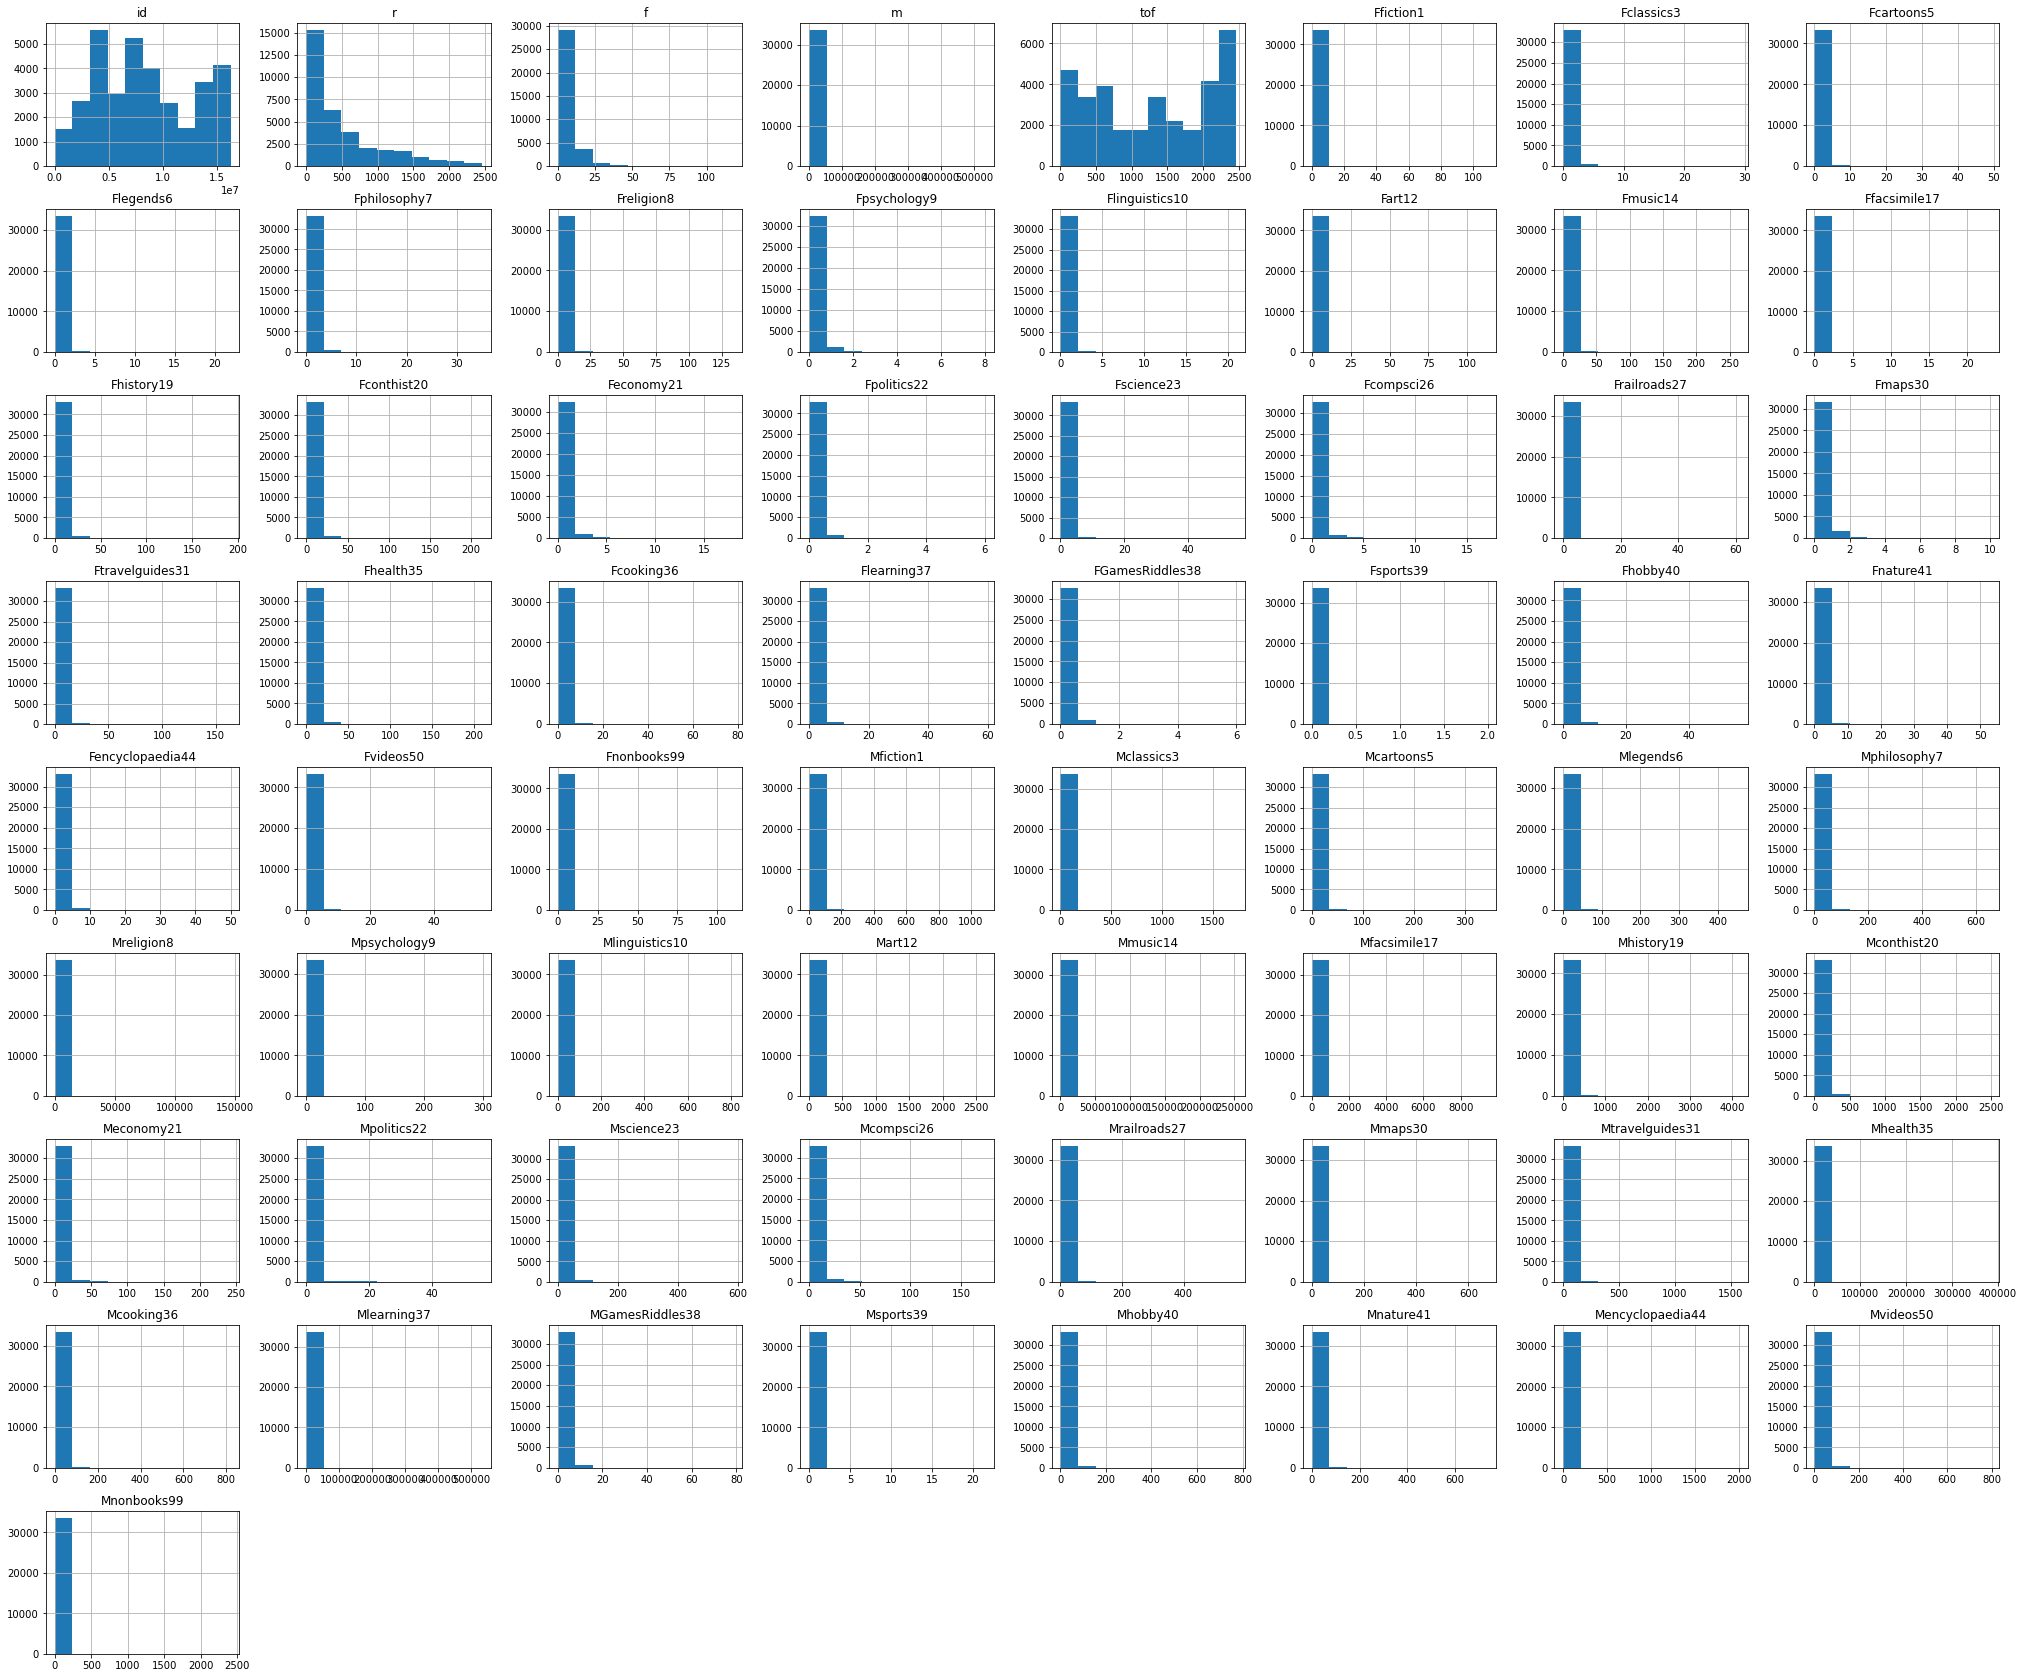%0A" class="jp-needs-light-background" />

In \[9\]:

    ecom[['r','f','m','tof','Fclassics3','Mclassics3']].hist(figsize=(10,12))

Out\[9\]:

    array([[<AxesSubplot:title={'center':'r'}>,
            <AxesSubplot:title={'center':'f'}>],
           [<AxesSubplot:title={'center':'m'}>,
            <AxesSubplot:title={'center':'tof'}>],
           [<AxesSubplot:title={'center':'Fclassics3'}>,
            <AxesSubplot:title={'center':'Mclassics3'}>]], dtype=object)

<img src="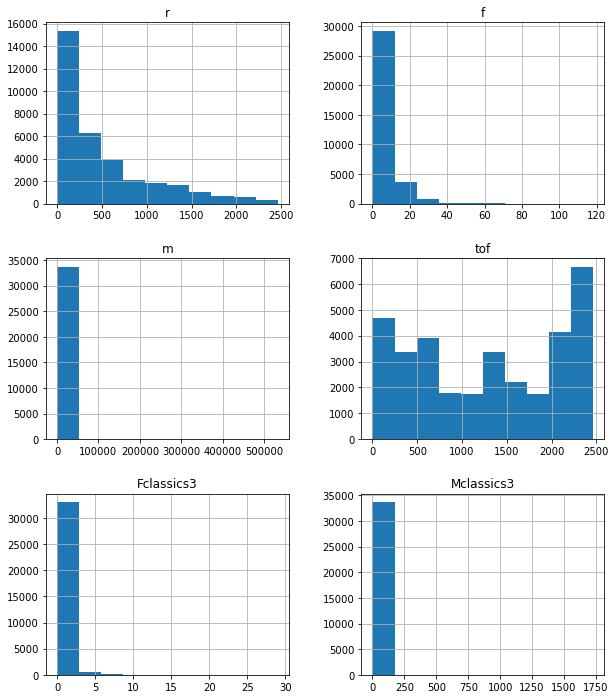%0A" class="jp-needs-light-background" />

# 2. Create a new data set with more descriptive labels and the data needed for analysis<a href="#2.-Create-a-new-data-set-with-more-descriptive-labels-and-the-data-needed-for-analysis" class="anchor-link">¶</a>

In \[10\]:

    #Rename data columns to make it more descriptive
    col = list(ecom.columns)
    def relabel_data(col):
        for i in range(len(col)):
            if col[i] == 'r':
                col[i] = 'recency'
            elif col[i] == 'f':
                col[i] = 'overall frequency'
            elif  col[i] == 'm':
                col[i] = 'overall monetary'
            elif  col[i] == 'tof':
                col[i] = 'time on file in days'
            elif  col[i][0] == 'F':
                col[i] = 'frequency: ' + col[i] [1:]
                col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
            elif  col[i][0] == 'M':
                col[i] = 'monetary: ' + col[i] [1:]
                col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])

        return col
                
    ecom.columns = relabel_data(col)     

In \[11\]:

    ecom.head()

Out\[11\]:

|     | id   | recency | overall frequency | overall monetary | time on file in days | frequency: fiction books | frequency: classics books | frequency: cartoons books | frequency: legends books | frequency: philosophy books | frequency: religion books | frequency: psychology books | frequency: linguistics books | frequency: art books | frequency: music books | frequency: facsimile books | frequency: history books | frequency: conthist books | frequency: economy books | frequency: politics books | frequency: science books | frequency: compsci books | frequency: railroads books | frequency: maps books | frequency: travelguides books | frequency: health books | frequency: cooking books | frequency: learning books | frequency: GamesRiddles books | frequency: sports books | frequency: hobby books | frequency: nature books | frequency: encyclopaedia books | frequency: videos books | frequency: nonbooks | monetary: fiction books | monetary: classics books | monetary: cartoons books | monetary: legends books | monetary: philosophy books | monetary: religion books | monetary: psychology books | monetary: linguistics books | monetary: art books | monetary: music books | monetary: facsimile books | monetary: history books | monetary: conthist books | monetary: economy books | monetary: politics books | monetary: science books | monetary: compsci books | monetary: railroads books | monetary: maps books | monetary: travelguides books | monetary: health books | monetary: cooking books | monetary: learning books | monetary: GamesRiddles books | monetary: sports books | monetary: hobby books | monetary: nature books | monetary: encyclopaedia books | monetary: videos books | monetary: nonbooks |
|-----|------|---------|-------------------|------------------|----------------------|--------------------------|---------------------------|---------------------------|--------------------------|-----------------------------|---------------------------|-----------------------------|------------------------------|----------------------|------------------------|----------------------------|--------------------------|---------------------------|--------------------------|---------------------------|--------------------------|--------------------------|----------------------------|-----------------------|-------------------------------|-------------------------|--------------------------|---------------------------|-------------------------------|-------------------------|------------------------|-------------------------|--------------------------------|-------------------------|---------------------|-------------------------|--------------------------|--------------------------|-------------------------|----------------------------|--------------------------|----------------------------|-----------------------------|---------------------|-----------------------|---------------------------|-------------------------|--------------------------|-------------------------|--------------------------|-------------------------|-------------------------|---------------------------|----------------------|------------------------------|------------------------|-------------------------|--------------------------|------------------------------|------------------------|-----------------------|------------------------|-------------------------------|------------------------|--------------------|
| 0   | 914  | 194     | 7                 | 318.894775       | 1703                 | 1                        | 0                         | 1                         | 0                        | 0                           | 0                         | 0                           | 0                            | 1                    | 7                      | 0                          | 0                        | 17                        | 0                        | 0                         | 0                        | 0                        | 0                          | 0                     | 2                             | 2                       | 1                        | 0                         | 0                             | 0                       | 0                      | 0                       | 0                              | 0                       | 0                   | 5.949997                | 0.0                      | 7.643810                 | 0.0                     | 0.00000                    | 0.000000                 | 0.0                        | 0.000000                    | 8.589699            | 61.429962             | 0.0                       | 0.000000                | 197.935547               | 0.000000                | 0.0                      | 0.000000                | 0.000000                | 0.000000                  | 0.0                  | 12.271004                    | 14.899994              | 10.174706               | 0.000000                 | 0.0                          | 0.0                    | 0.000000              | 0.000000               | 0.0                           | 0.000000               | 0.0                |
| 1   | 957  | 3       | 14                | 368.052246       | 2364                 | 1                        | 0                         | 2                         | 0                        | 0                           | 0                         | 0                           | 0                            | 0                    | 4                      | 0                          | 4                        | 4                         | 0                        | 0                         | 0                        | 1                        | 0                          | 0                     | 0                             | 7                       | 0                        | 4                         | 0                             | 0                       | 4                      | 2                       | 1                              | 0                       | 0                   | 12.680038               | 0.0                      | 20.236496                | 0.0                     | 0.00000                    | 0.000000                 | 0.0                        | 0.000000                    | 0.000000            | 29.414169             | 0.0                       | 53.839020               | 60.749969                | 0.000000                | 0.0                      | 0.000000                | 5.899998                | 0.000000                  | 0.0                  | 0.000000                     | 74.156250              | 0.000000                | 22.749985                | 0.0                          | 0.0                    | 61.176025             | 17.150269              | 10.0                          | 0.000000               | 0.0                |
| 2   | 1406 | 1489    | 15                | 423.298340       | 2371                 | 0                        | 0                         | 0                         | 0                        | 0                           | 0                         | 0                           | 0                            | 0                    | 0                      | 0                          | 1                        | 34                        | 0                        | 0                         | 0                        | 0                        | 0                          | 0                     | 0                             | 0                       | 0                        | 0                         | 0                             | 0                       | 0                      | 0                       | 0                              | 0                       | 0                   | 0.000000                | 0.0                      | 0.000000                 | 0.0                     | 0.00000                    | 0.000000                 | 0.0                        | 0.000000                    | 0.000000            | 0.000000              | 0.0                       | 10.123573               | 413.174805               | 0.000000                | 0.0                      | 0.000000                | 0.000000                | 0.000000                  | 0.0                  | 0.000000                     | 0.000000               | 0.000000                | 0.000000                 | 0.0                          | 0.0                    | 0.000000              | 0.000000               | 0.0                           | 0.000000               | 0.0                |
| 3   | 1414 | 155     | 4                 | 71.217041        | 1290                 | 0                        | 0                         | 0                         | 0                        | 0                           | 0                         | 0                           | 0                            | 0                    | 0                      | 0                          | 0                        | 7                         | 0                        | 0                         | 0                        | 0                        | 0                          | 0                     | 0                             | 0                       | 0                        | 0                         | 0                             | 0                       | 0                      | 0                       | 0                              | 0                       | 0                   | 0.000000                | 0.0                      | 0.000000                 | 0.0                     | 0.00000                    | 0.000000                 | 0.0                        | 0.000000                    | 0.000000            | 0.000000              | 0.0                       | 0.000000                | 71.217041                | 0.000000                | 0.0                      | 0.000000                | 0.000000                | 0.000000                  | 0.0                  | 0.000000                     | 0.000000               | 0.000000                | 0.000000                 | 0.0                          | 0.0                    | 0.000000              | 0.000000               | 0.0                           | 0.000000               | 0.0                |
| 4   | 1546 | 194     | 6                 | 442.638184       | 2188                 | 0                        | 0                         | 1                         | 0                        | 3                           | 1                         | 0                           | 1                            | 1                    | 3                      | 0                          | 6                        | 7                         | 1                        | 0                         | 2                        | 0                        | 2                          | 0                     | 1                             | 3                       | 0                        | 2                         | 0                             | 0                       | 2                      | 0                       | 0                              | 3                       | 0                   | 0.000000                | 0.0                      | 8.899994                 | 0.0                     | 26.19841                   | 19.899994                | 0.0                        | 6.621227                    | 15.313187           | 39.804047             | 0.0                       | 64.744934               | 86.945740                | 5.112919                | 0.0                      | 19.849991               | 0.000000                | 9.960655                  | 0.0                  | 10.123573                    | 41.518219              | 0.000000                | 7.949997                 | 0.0                          | 0.0                    | 17.895203             | 0.000000               | 0.0                           | 61.799988              | 0.0                |

In \[12\]:

    cor = ecom.corr()
    cor

Out\[12\]:

|                                | id        | recency   | overall frequency | overall monetary | time on file in days | frequency: fiction books | frequency: classics books | frequency: cartoons books | frequency: legends books | frequency: philosophy books | frequency: religion books | frequency: psychology books | frequency: linguistics books | frequency: art books | frequency: music books | frequency: facsimile books | frequency: history books | frequency: conthist books | frequency: economy books | frequency: politics books | frequency: science books | frequency: compsci books | frequency: railroads books | frequency: maps books | frequency: travelguides books | frequency: health books | frequency: cooking books | frequency: learning books | frequency: GamesRiddles books | frequency: sports books | frequency: hobby books | frequency: nature books | frequency: encyclopaedia books | frequency: videos books | frequency: nonbooks | monetary: fiction books | monetary: classics books | monetary: cartoons books | monetary: legends books | monetary: philosophy books | monetary: religion books | monetary: psychology books | monetary: linguistics books | monetary: art books | monetary: music books | monetary: facsimile books | monetary: history books | monetary: conthist books | monetary: economy books | monetary: politics books | monetary: science books | monetary: compsci books | monetary: railroads books | monetary: maps books | monetary: travelguides books | monetary: health books | monetary: cooking books | monetary: learning books | monetary: GamesRiddles books | monetary: sports books | monetary: hobby books | monetary: nature books | monetary: encyclopaedia books | monetary: videos books | monetary: nonbooks |
|--------------------------------|-----------|-----------|-------------------|------------------|----------------------|--------------------------|---------------------------|---------------------------|--------------------------|-----------------------------|---------------------------|-----------------------------|------------------------------|----------------------|------------------------|----------------------------|--------------------------|---------------------------|--------------------------|---------------------------|--------------------------|--------------------------|----------------------------|-----------------------|-------------------------------|-------------------------|--------------------------|---------------------------|-------------------------------|-------------------------|------------------------|-------------------------|--------------------------------|-------------------------|---------------------|-------------------------|--------------------------|--------------------------|-------------------------|----------------------------|--------------------------|----------------------------|-----------------------------|---------------------|-----------------------|---------------------------|-------------------------|--------------------------|-------------------------|--------------------------|-------------------------|-------------------------|---------------------------|----------------------|------------------------------|------------------------|-------------------------|--------------------------|------------------------------|------------------------|-----------------------|------------------------|-------------------------------|------------------------|--------------------|
| id                             | 1.000000  | -0.310700 | -0.337807         | -0.024909        | -0.752211            | -0.166494                | -0.159092                 | -0.096570                 | -0.095544                | -0.135028                   | -0.161473                 | -0.073380                   | -0.152070                    | -0.173280            | -0.069715              | -0.085597                  | -0.226979                | -0.137457                 | -0.117733                | -0.064639                 | -0.144404                | -0.121408                | -0.099986                  | -0.116821             | -0.194703                     | -0.128197               | -0.119791                | -0.085313                 | -0.041463                     | -0.025583               | -0.197292              | -0.109665               | -0.150535                      | 0.014502                | -0.033797           | -0.151191               | -0.074826                | -0.117624                | -0.070139               | -0.111280                  | -0.007527                | -0.039390                  | -0.118882                   | -0.147551           | 0.003109              | -0.026917                 | -0.206601               | -0.138244                | -0.117865               | -0.063332                | -0.128751               | -0.120795               | -0.104526                 | -0.057843            | -0.184421                    | -0.006329              | -0.110499               | -0.003565                | -0.042364                    | -0.024965              | -0.177956             | -0.091613              | -0.058368                     | 0.021313               | -0.046721          |
| recency                        | -0.310700 | 1.000000  | -0.241652         | -0.021565        | 0.396476             | -0.103736                | -0.047820                 | -0.122402                 | -0.057393                | -0.061492                   | -0.092282                 | -0.048599                   | -0.043056                    | -0.071444            | -0.166959              | -0.003403                  | -0.129844                | -0.143932                 | -0.047497                | -0.045047                 | -0.075936                | -0.050686                | -0.059282                  | -0.015335             | -0.084221                     | -0.130798               | -0.037973                | -0.130950                 | -0.057728                     | -0.006237               | -0.082034              | -0.106711               | -0.086524                      | -0.140533               | -0.013876           | -0.076462               | -0.012858                | -0.087033                | -0.042856               | -0.024474                  | -0.009038                | -0.019829                  | -0.016810                   | -0.052598           | -0.010643             | -0.001805                 | -0.106929               | -0.130452                | -0.026565               | -0.033599                | -0.065645               | -0.034020               | -0.053692                 | 0.021375             | -0.068960                    | -0.005633              | 0.007521                | -0.004846                | -0.049646                    | -0.006814              | -0.052261             | -0.080255              | -0.028555                     | -0.141410              | -0.008424          |
| overall frequency              | -0.337807 | -0.241652 | 1.000000          | 0.080293         | 0.478442             | 0.501850                 | 0.399790                  | 0.417034                  | 0.301712                 | 0.368289                    | 0.463707                  | 0.236465                    | 0.351641                     | 0.487765             | 0.448382               | 0.162150                   | 0.635548                 | 0.484181                  | 0.296653                 | 0.208413                  | 0.397993                 | 0.297540                 | 0.253597                   | 0.254628              | 0.498095                      | 0.438626                | 0.337777                 | 0.359155                  | 0.165886                      | 0.056736                | 0.504940               | 0.380598                | 0.431740                       | 0.225006                | 0.223907            | 0.434760                | 0.170394                 | 0.396921                 | 0.221459                | 0.256497                   | 0.040404                 | 0.125347                   | 0.260850                    | 0.410956            | 0.018373              | 0.059597                  | 0.550229                | 0.459359                 | 0.263502                | 0.183214                 | 0.337793                | 0.271263                | 0.251873                  | 0.119549             | 0.470944                     | 0.018576               | 0.267088                | 0.005868                 | 0.150295                     | 0.055124               | 0.423926              | 0.300841               | 0.167855                      | 0.207956               | 0.137614           |
| overall monetary               | -0.024909 | -0.021565 | 0.080293          | 1.000000         | 0.039395             | 0.057410                 | 0.039364                  | 0.053524                  | 0.029569                 | 0.038434                    | 0.056000                  | 0.040228                    | 0.044285                     | 0.056274             | 0.052533               | 0.033960                   | 0.069440                 | 0.047343                  | 0.036068                 | 0.019767                  | 0.046682                 | 0.042399                 | 0.022965                   | 0.049981              | 0.064743                      | 0.061834                | 0.040821                 | 0.115622                  | 0.017206                      | 0.005665                | 0.060102               | 0.046926                | 0.069638                       | 0.022879                | 0.014078            | 0.051940                | 0.025496                 | 0.057285                 | 0.023905                | 0.030734                   | 0.206765                 | 0.025888                   | 0.034558                    | 0.054060            | 0.352653              | 0.031078                  | 0.069264                | 0.047330                 | 0.031259                | 0.017917                 | 0.049295                | 0.039827                | 0.024108                  | 0.019612             | 0.067689                     | 0.531931               | 0.036660                | 0.738498                 | 0.017426                     | 0.005537               | 0.053808              | 0.039885               | 0.038610                      | 0.022922               | 0.021662           |
| time on file in days           | -0.752211 | 0.396476  | 0.478442          | 0.039395         | 1.000000             | 0.227439                 | 0.208050                  | 0.148375                  | 0.136652                 | 0.185128                    | 0.216459                  | 0.107241                    | 0.220711                     | 0.234887             | 0.097963               | 0.118281                   | 0.308645                 | 0.195176                  | 0.178133                 | 0.097291                  | 0.195787                 | 0.168719                 | 0.134874                   | 0.171039              | 0.259823                      | 0.202200                | 0.172164                 | 0.147497                  | 0.064380                      | 0.034377                | 0.272691               | 0.158286                | 0.221751                       | 0.011838                | 0.127651            | 0.207624                | 0.099274                 | 0.175967                 | 0.102224                | 0.152793                   | 0.010842                 | 0.056385                   | 0.176297                    | 0.204204            | -0.001208             | 0.038810                  | 0.280478                | 0.196154                 | 0.175992                | 0.093294                 | 0.170588                | 0.166453                | 0.142207                  | 0.090605             | 0.250362                     | 0.011573               | 0.162632                | 0.007588                 | 0.064139                     | 0.032010               | 0.247035              | 0.125468               | 0.088679                      | 0.001748               | 0.069112           |
| frequency: fiction books       | -0.166494 | -0.103736 | 0.501850          | 0.057410         | 0.227439             | 1.000000                 | 0.507802                  | 0.517046                  | 0.396642                 | 0.319892                    | 0.350857                  | 0.236567                    | 0.349096                     | 0.435719             | 0.341888               | 0.107593                   | 0.437325                 | 0.253914                  | 0.204083                 | 0.171703                  | 0.297022                 | 0.210435                 | 0.147413                   | 0.194881              | 0.376978                      | 0.339085                | 0.313021                 | 0.308468                  | 0.193641                      | 0.033499                | 0.445854               | 0.413754                | 0.404053                       | 0.168300                | 0.136666            | 0.843684                | 0.214786                 | 0.493646                 | 0.275015                | 0.193957                   | 0.022292                 | 0.109037                   | 0.259405                    | 0.358846            | 0.013513              | 0.030445                  | 0.346646                | 0.219922                 | 0.171945                | 0.128054                 | 0.246074                | 0.191551                | 0.144877                  | 0.098276             | 0.347981                     | 0.008065               | 0.238930                | 0.005805                 | 0.159391                     | 0.031463               | 0.350046              | 0.323720               | 0.169461                      | 0.151829               | 0.090003           |
| frequency: classics books      | -0.159092 | -0.047820 | 0.399790          | 0.039364         | 0.208050             | 0.507802                 | 1.000000                  | 0.278315                  | 0.287181                 | 0.352381                    | 0.276543                  | 0.176865                    | 0.241661                     | 0.380259             | 0.241600               | 0.100607                   | 0.377372                 | 0.212336                  | 0.116608                 | 0.109751                  | 0.223172                 | 0.111920                 | 0.070557                   | 0.138312              | 0.272413                      | 0.173886                | 0.172228                 | 0.173589                  | 0.110653                      | 0.032602                | 0.268403               | 0.236490                | 0.252577                       | 0.074924                | 0.103271            | 0.469653                | 0.472435                 | 0.279368                 | 0.207804                | 0.272284                   | 0.010867                 | 0.118048                   | 0.192810                    | 0.309034            | 0.010169              | 0.020990                  | 0.314817                | 0.192408                 | 0.099461                | 0.091708                 | 0.190650                | 0.106398                | 0.072487                  | 0.069647             | 0.260292                     | 0.002233               | 0.139204                | -0.000566                | 0.096116                     | 0.033935               | 0.221356              | 0.197418               | 0.112909                      | 0.072381               | 0.090814           |
| frequency: cartoons books      | -0.096570 | -0.122402 | 0.417034          | 0.053524         | 0.148375             | 0.517046                 | 0.278315                  | 1.000000                  | 0.255540                 | 0.224339                    | 0.321540                  | 0.198876                    | 0.326287                     | 0.253813             | 0.282748               | 0.067949                   | 0.311204                 | 0.218632                  | 0.197426                 | 0.161955                  | 0.246796                 | 0.195506                 | 0.118746                   | 0.141779              | 0.289035                      | 0.299685                | 0.250202                 | 0.305237                  | 0.174915                      | 0.032458                | 0.343682               | 0.288455                | 0.405259                       | 0.139095                | 0.088432            | 0.398780                | 0.096127                 | 0.928025                 | 0.155153                | 0.121994                   | 0.011316                 | 0.095216                   | 0.213703                    | 0.195518            | 0.010232              | 0.016945                  | 0.245782                | 0.186481                 | 0.160386                | 0.137214                 | 0.196973                | 0.173277                | 0.110875                  | 0.065838             | 0.259681                     | 0.009143               | 0.184988                | 0.019281                 | 0.155847                     | 0.030406               | 0.268836              | 0.216389               | 0.136571                      | 0.122489               | 0.042581           |
| frequency: legends books       | -0.095544 | -0.057393 | 0.301712          | 0.029569         | 0.136652             | 0.396642                 | 0.287181                  | 0.255540                  | 1.000000                 | 0.203031                    | 0.233912                  | 0.122745                    | 0.207410                     | 0.265550             | 0.166817               | 0.079104                   | 0.292362                 | 0.126677                  | 0.095596                 | 0.085396                  | 0.197272                 | 0.108227                 | 0.087422                   | 0.137256              | 0.217967                      | 0.176782                | 0.168458                 | 0.147138                  | 0.105558                      | 0.009902                | 0.253870               | 0.264314                | 0.217267                       | 0.076022                | 0.071395            | 0.336681                | 0.127165                 | 0.244316                 | 0.764383                | 0.128459                   | 0.008969                 | 0.059414                   | 0.159645                    | 0.226140            | 0.006817              | 0.019650                  | 0.235055                | 0.111106                 | 0.075602                | 0.066304                 | 0.166222                | 0.104968                | 0.086097                  | 0.060429             | 0.201213                     | 0.002453               | 0.124335                | -0.000413                | 0.083901                     | 0.009592               | 0.200882              | 0.208505               | 0.101423                      | 0.069285               | 0.064433           |
| frequency: philosophy books    | -0.135028 | -0.061492 | 0.368289          | 0.038434         | 0.185128             | 0.319892                 | 0.352381                  | 0.224339                  | 0.203031                 | 1.000000                    | 0.473944                  | 0.257530                    | 0.290913                     | 0.284101             | 0.152014               | 0.079956                   | 0.347618                 | 0.180669                  | 0.200279                 | 0.148723                  | 0.379764                 | 0.161391                 | 0.051890                   | 0.110198              | 0.181074                      | 0.255950                | 0.131014                 | 0.261962                  | 0.106371                      | 0.019728                | 0.217349               | 0.188724                | 0.295652                       | 0.062933                | 0.078570            | 0.292593                | 0.166852                 | 0.216968                 | 0.160666                | 0.809594                   | 0.018868                 | 0.158155                   | 0.226006                    | 0.242377            | 0.006163              | 0.024311                  | 0.303023                | 0.170075                 | 0.195187                | 0.131943                 | 0.327395                | 0.159089                | 0.056662                  | 0.052504             | 0.176171                     | 0.003889               | 0.099836                | -0.000116                | 0.092338                     | 0.018892               | 0.180793              | 0.156125               | 0.144917                      | 0.067735               | 0.060429           |
| frequency: religion books      | -0.161473 | -0.092282 | 0.463707          | 0.056000         | 0.216459             | 0.350857                 | 0.276543                  | 0.321540                  | 0.233912                 | 0.473944                    | 1.000000                  | 0.233444                    | 0.312082                     | 0.339844             | 0.178927               | 0.115221                   | 0.492262                 | 0.271099                  | 0.197592                 | 0.169983                  | 0.396092                 | 0.182256                 | 0.081440                   | 0.145649              | 0.294430                      | 0.305044                | 0.174027                 | 0.258309                  | 0.128563                      | 0.037329                | 0.299237               | 0.233462                | 0.341579                       | 0.087241                | 0.076548            | 0.303282                | 0.116476                 | 0.304351                 | 0.168884                | 0.314365                   | 0.057087                 | 0.118482                   | 0.244752                    | 0.289616            | 0.006886              | 0.040315                  | 0.408368                | 0.244634                 | 0.176509                | 0.154599                 | 0.324857                | 0.168570                | 0.084423                  | 0.062829             | 0.276894                     | 0.004639               | 0.133719                | 0.006551                 | 0.117040                     | 0.034743               | 0.242966              | 0.182953               | 0.147185                      | 0.083722               | 0.056459           |
| frequency: psychology books    | -0.073380 | -0.048599 | 0.236465          | 0.040228         | 0.107241             | 0.236567                 | 0.176865                  | 0.198876                  | 0.122745                 | 0.257530                    | 0.233444                  | 1.000000                    | 0.208304                     | 0.176179             | 0.115465               | 0.034346                   | 0.192100                 | 0.120165                  | 0.171458                 | 0.132685                  | 0.237964                 | 0.156257                 | 0.055324                   | 0.073202              | 0.114254                      | 0.253715                | 0.125185                 | 0.221845                  | 0.127910                      | 0.010896                | 0.177292               | 0.173643                | 0.199805                       | 0.065558                | 0.063559            | 0.205693                | 0.082251                 | 0.194243                 | 0.091480                | 0.190994                   | 0.029898                 | 0.590661                   | 0.160330                    | 0.161958            | 0.004815              | 0.010312                  | 0.164553                | 0.107653                 | 0.156586                | 0.113082                 | 0.214067                | 0.151086                | 0.059966                  | 0.046010             | 0.106666                     | 0.025106               | 0.093458                | 0.000178                 | 0.114963                     | 0.012262               | 0.139484              | 0.143990               | 0.099713                      | 0.067961               | 0.050955           |
| frequency: linguistics books   | -0.152070 | -0.043056 | 0.351641          | 0.044285         | 0.220711             | 0.349096                 | 0.241661                  | 0.326287                  | 0.207410                 | 0.290913                    | 0.312082                  | 0.208304                    | 1.000000                     | 0.285505             | 0.158412               | 0.069821                   | 0.360109                 | 0.192200                  | 0.249003                 | 0.166511                  | 0.313090                 | 0.209781                 | 0.110380                   | 0.159615              | 0.222702                      | 0.257342                | 0.182414                 | 0.374574                  | 0.165308                      | 0.024200                | 0.305316               | 0.236357                | 0.476768                       | 0.087888                | 0.114557            | 0.304626                | 0.114634                 | 0.316242                 | 0.153472                | 0.206457                   | 0.012604                 | 0.118831                   | 0.770981                    | 0.252897            | 0.006359              | 0.012504                  | 0.306253                | 0.176505                 | 0.228978                | 0.150468                 | 0.275867                | 0.203456                | 0.107899                  | 0.083202             | 0.214437                     | 0.003775               | 0.145828                | 0.008562                 | 0.151389                     | 0.022692               | 0.263838              | 0.207626               | 0.212524                      | 0.080310               | 0.081039           |
| frequency: art books           | -0.173280 | -0.071444 | 0.487765          | 0.056274         | 0.234887             | 0.435719                 | 0.380259                  | 0.253813                  | 0.265550                 | 0.284101                    | 0.339844                  | 0.176179                    | 0.285505                     | 1.000000             | 0.276188               | 0.189609                   | 0.542215                 | 0.241149                  | 0.137514                 | 0.112304                  | 0.271722                 | 0.187860                 | 0.160366                   | 0.198044              | 0.427030                      | 0.189308                | 0.232393                 | 0.204596                  | 0.150684                      | 0.035314                | 0.434592               | 0.338969                | 0.268893                       | 0.124126                | 0.130702            | 0.400073                | 0.193162                 | 0.253083                 | 0.210907                | 0.209379                   | 0.021253                 | 0.091330                   | 0.248136                    | 0.900614            | 0.013062              | 0.056816                  | 0.491381                | 0.224748                 | 0.126675                | 0.090912                 | 0.240469                | 0.182352                | 0.168956                  | 0.116563             | 0.443078                     | 0.002187               | 0.201893                | -0.000726                | 0.140002                     | 0.034886               | 0.390511              | 0.296633               | 0.137380                      | 0.120624               | 0.092110           |
| frequency: music books         | -0.069715 | -0.166959 | 0.448382          | 0.052533         | 0.097963             | 0.341888                 | 0.241600                  | 0.282748                  | 0.166817                 | 0.152014                    | 0.178927                  | 0.115465                    | 0.158412                     | 0.276188             | 1.000000               | 0.051352                   | 0.236435                 | 0.158111                  | 0.125178                 | 0.102322                  | 0.165130                 | 0.169374                 | 0.108301                   | 0.119101              | 0.260556                      | 0.208229                | 0.196934                 | 0.195926                  | 0.101400                      | 0.033656                | 0.263849               | 0.227959                | 0.222814                       | 0.177952                | 0.091524            | 0.277202                | 0.095116                 | 0.248892                 | 0.114966                | 0.098532                   | 0.030177                 | 0.056981                   | 0.111700                    | 0.213008            | 0.046191              | 0.012134                  | 0.193784                | 0.140619                 | 0.103256                | 0.080427                 | 0.130647                | 0.150475                | 0.100527                  | 0.042173             | 0.236263                     | 0.002136               | 0.140685                | 0.009625                 | 0.082578                     | 0.035151               | 0.212061              | 0.168889               | 0.079319                      | 0.158481               | 0.058344           |
| frequency: facsimile books     | -0.085597 | -0.003403 | 0.162150          | 0.033960         | 0.118281             | 0.107593                 | 0.100607                  | 0.067949                  | 0.079104                 | 0.079956                    | 0.115221                  | 0.034346                    | 0.069821                     | 0.189609             | 0.051352               | 1.000000                   | 0.191239                 | 0.032474                  | 0.040779                 | 0.016571                  | 0.080776                 | 0.048983                 | 0.034348                   | 0.072495              | 0.093747                      | 0.039801                | 0.061795                 | 0.045583                  | 0.043607                      | 0.008428                | 0.147626               | 0.089393                | 0.087990                       | 0.017696                | 0.024236            | 0.121149                | 0.068571                 | 0.084302                 | 0.065634                | 0.071474                   | 0.009249                 | 0.028644                   | 0.067856                    | 0.202947            | 0.002511              | 0.656864                  | 0.257267                | 0.046561                 | 0.036770                | 0.024256                 | 0.098638                | 0.051146                | 0.040796                  | 0.072305             | 0.101349                     | 0.000320               | 0.057827                | -0.000449                | 0.065055                     | 0.010031               | 0.143333              | 0.104346               | 0.064491                      | 0.028703               | 0.125144           |
| frequency: history books       | -0.226979 | -0.129844 | 0.635548          | 0.069440         | 0.308645             | 0.437325                 | 0.377372                  | 0.311204                  | 0.292362                 | 0.347618                    | 0.492262                  | 0.192100                    | 0.360109                     | 0.542215             | 0.236435               | 0.191239                   | 1.000000                 | 0.511912                  | 0.202948                 | 0.160625                  | 0.367372                 | 0.200301                 | 0.208564                   | 0.229869              | 0.445103                      | 0.214248                | 0.214863                 | 0.226440                  | 0.144108                      | 0.036185                | 0.398435               | 0.310656                | 0.371089                       | 0.124393                | 0.102523            | 0.395321                | 0.172343                 | 0.311062                 | 0.215655                | 0.261372                   | 0.023515                 | 0.110195                   | 0.285658                    | 0.486967            | 0.011500              | 0.064801                  | 0.893455                | 0.492747                 | 0.180550                | 0.142791                 | 0.322880                | 0.190102                | 0.217376                  | 0.128633             | 0.440388                     | 0.003034               | 0.172690                | 0.000489                 | 0.142720                     | 0.037170               | 0.352374              | 0.264087               | 0.179105                      | 0.127100               | 0.091516           |
| frequency: conthist books      | -0.137457 | -0.143932 | 0.484181          | 0.047343         | 0.195176             | 0.253914                 | 0.212336                  | 0.218632                  | 0.126677                 | 0.180669                    | 0.271099                  | 0.120165                    | 0.192200                     | 0.241149             | 0.158111               | 0.032474                   | 0.511912                 | 1.000000                  | 0.169775                 | 0.165930                  | 0.206156                 | 0.133669                 | 0.268885                   | 0.143787              | 0.223913                      | 0.141942                | 0.122627                 | 0.131711                  | 0.049948                      | 0.039288                | 0.216515               | 0.158325                | 0.218172                       | 0.125271                | 0.067647            | 0.223014                | 0.091168                 | 0.200224                 | 0.090364                | 0.126614                   | 0.010159                 | 0.065921                   | 0.135715                    | 0.195102            | 0.005580              | 0.008108                  | 0.419463                | 0.970517                 | 0.142390                | 0.142138                 | 0.168838                | 0.123391                | 0.276438                  | 0.063743             | 0.204912                     | 0.001841               | 0.090348                | 0.000423                 | 0.043439                     | 0.041216               | 0.179654              | 0.117302               | 0.084233                      | 0.142496               | 0.074677           |
| frequency: economy books       | -0.117733 | -0.047497 | 0.296653          | 0.036068         | 0.178133             | 0.204083                 | 0.116608                  | 0.197426                  | 0.095596                 | 0.200279                    | 0.197592                  | 0.171458                    | 0.249003                     | 0.137514             | 0.125178               | 0.040779                   | 0.202948                 | 0.169775                  | 1.000000                 | 0.185327                  | 0.240818                 | 0.287903                 | 0.081972                   | 0.114593              | 0.195035                      | 0.430149                | 0.217767                 | 0.390248                  | 0.115978                      | 0.042987                | 0.313857               | 0.199143                | 0.277467                       | 0.086855                | 0.077308            | 0.165751                | 0.046042                 | 0.191816                 | 0.058684                | 0.133643                   | 0.006536                 | 0.084942                   | 0.173593                    | 0.114617            | 0.004069              | 0.011216                  | 0.166573                | 0.147985                 | 0.929373                | 0.162677                 | 0.206728                | 0.264494                | 0.084434                  | 0.051481             | 0.175319                     | 0.021872               | 0.166115                | 0.000490                 | 0.108809                     | 0.039176               | 0.257179              | 0.147722               | 0.103409                      | 0.074344               | 0.036234           |
| frequency: politics books      | -0.064639 | -0.045047 | 0.208413          | 0.019767         | 0.097291             | 0.171703                 | 0.109751                  | 0.161955                  | 0.085396                 | 0.148723                    | 0.169983                  | 0.132685                    | 0.166511                     | 0.112304             | 0.102322               | 0.016571                   | 0.160625                 | 0.165930                  | 0.185327                 | 1.000000                  | 0.152834                 | 0.141997                 | 0.073982                   | 0.079201              | 0.107363                      | 0.176125                | 0.107372                 | 0.161063                  | 0.067404                      | 0.015004                | 0.160106               | 0.147153                | 0.177750                       | 0.065769                | 0.049609            | 0.151969                | 0.054580                 | 0.156785                 | 0.062906                | 0.085111                   | 0.006331                 | 0.054895                   | 0.119545                    | 0.102535            | 0.004254              | 0.003748                  | 0.133004                | 0.146445                 | 0.164683                | 0.897484                 | 0.133624                | 0.130400                | 0.078949                  | 0.045112             | 0.101733                     | 0.002862               | 0.077529                | -0.000058                | 0.055612                     | 0.013910               | 0.134880              | 0.118679               | 0.072406                      | 0.070083               | 0.034995           |
| frequency: science books       | -0.144404 | -0.075936 | 0.397993          | 0.046682         | 0.195787             | 0.297022                 | 0.223172                  | 0.246796                  | 0.197272                 | 0.379764                    | 0.396092                  | 0.237964                    | 0.313090                     | 0.271722             | 0.165130               | 0.080776                   | 0.367372                 | 0.206156                  | 0.240818                 | 0.152834                  | 1.000000                 | 0.266654                 | 0.108563                   | 0.182558              | 0.203713                      | 0.325457                | 0.174257                 | 0.327985                  | 0.196071                      | 0.072792                | 0.334955               | 0.287225                | 0.337479                       | 0.082224                | 0.087670            | 0.252687                | 0.102675                 | 0.240395                 | 0.143932                | 0.269632                   | 0.018971                 | 0.127643                   | 0.234588                    | 0.234513            | 0.006729              | 0.030312                  | 0.317881                | 0.190939                 | 0.226372                | 0.139131                 | 0.890117                | 0.264118                | 0.114061                  | 0.096411             | 0.196850                     | 0.009173               | 0.133755                | 0.003823                 | 0.194589                     | 0.068352               | 0.285444              | 0.241165               | 0.149581                      | 0.076791               | 0.056708           |
| frequency: compsci books       | -0.121408 | -0.050686 | 0.297540          | 0.042399         | 0.168719             | 0.210435                 | 0.111920                  | 0.195506                  | 0.108227                 | 0.161391                    | 0.182256                  | 0.156257                    | 0.209781                     | 0.187860             | 0.169374               | 0.048983                   | 0.200301                 | 0.133669                  | 0.287903                 | 0.141997                  | 0.266654                 | 1.000000                 | 0.090747                   | 0.154750              | 0.187437                      | 0.303814                | 0.190212                 | 0.306309                  | 0.131725                      | 0.052704                | 0.291955               | 0.201452                | 0.308294                       | 0.115524                | 0.082588            | 0.185755                | 0.056723                 | 0.192522                 | 0.079499                | 0.113422                   | 0.016252                 | 0.075237                   | 0.158852                    | 0.172393            | 0.007105              | 0.015703                  | 0.178409                | 0.119759                 | 0.262029                | 0.119243                 | 0.238232                | 0.940619                | 0.094459                  | 0.074117             | 0.172302                     | 0.014010               | 0.145383                | 0.009343                 | 0.123664                     | 0.051961               | 0.245484              | 0.160743               | 0.144961                      | 0.101772               | 0.054875           |
| frequency: railroads books     | -0.099986 | -0.059282 | 0.253597          | 0.022965         | 0.134874             | 0.147413                 | 0.070557                  | 0.118746                  | 0.087422                 | 0.051890                    | 0.081440                  | 0.055324                    | 0.110380                     | 0.160366             | 0.108301               | 0.034348                   | 0.208564                 | 0.268885                  | 0.081972                 | 0.073982                  | 0.108563                 | 0.090747                 | 1.000000                   | 0.129381              | 0.209358                      | 0.071155                | 0.097503                 | 0.079545                  | 0.051660                      | 0.003237                | 0.229216               | 0.130132                | 0.122340                       | 0.139106                | 0.045398            | 0.125301                | 0.030385                 | 0.112050                 | 0.065009                | 0.025654                   | 0.002654                 | 0.019830                   | 0.079799                    | 0.140275            | 0.004019              | 0.008748                  | 0.179353                | 0.264506                 | 0.069284                | 0.061361                 | 0.096195                | 0.083842                | 0.956481                  | 0.059384             | 0.197835                     | 0.000323               | 0.074224                | -0.000680                | 0.051527                     | 0.002766               | 0.195397              | 0.103285               | 0.049452                      | 0.125907               | 0.030625           |
| frequency: maps books          | -0.116821 | -0.015335 | 0.254628          | 0.049981         | 0.171039             | 0.194881                 | 0.138312                  | 0.141779                  | 0.137256                 | 0.110198                    | 0.145649                  | 0.073202                    | 0.159615                     | 0.198044             | 0.119101               | 0.072495                   | 0.229869                 | 0.143787                  | 0.114593                 | 0.079201                  | 0.182558                 | 0.154750                 | 0.129381                   | 1.000000              | 0.255957                      | 0.125601                | 0.131961                 | 0.132916                  | 0.090046                      | 0.023365                | 0.216384               | 0.189064                | 0.217512                       | 0.106705                | 0.058603            | 0.171100                | 0.063219                 | 0.142026                 | 0.099054                | 0.076714                   | 0.005855                 | 0.033462                   | 0.141937                    | 0.189892            | 0.004812              | 0.029439                  | 0.214362                | 0.134915                 | 0.102958                | 0.061945                 | 0.171199                | 0.152854                | 0.122844                  | 0.619040             | 0.241278                     | 0.001427               | 0.105755                | 0.031871                 | 0.085702                     | 0.017690               | 0.179875              | 0.166145               | 0.097849                      | 0.094912               | 0.043098           |
| frequency: travelguides books  | -0.194703 | -0.084221 | 0.498095          | 0.064743         | 0.259823             | 0.376978                 | 0.272413                  | 0.289035                  | 0.217967                 | 0.181074                    | 0.294430                  | 0.114254                    | 0.222702                     | 0.427030             | 0.260556               | 0.093747                   | 0.445103                 | 0.223913                  | 0.195035                 | 0.107363                  | 0.203713                 | 0.187437                 | 0.209358                   | 0.255957              | 1.000000                      | 0.238768                | 0.356625                 | 0.239166                  | 0.116218                      | 0.044709                | 0.402243               | 0.324145                | 0.297123                       | 0.176083                | 0.093998            | 0.313846                | 0.114386                 | 0.271054                 | 0.137706                | 0.108351                   | 0.018756                 | 0.041900                   | 0.163321                    | 0.356520            | 0.013586              | 0.019472                  | 0.367689                | 0.199160                 | 0.167601                | 0.086360                 | 0.166089                | 0.167544                | 0.199261                  | 0.106801             | 0.952995                     | 0.002907               | 0.299592                | 0.019251                 | 0.100860                     | 0.039917               | 0.336794              | 0.246871               | 0.116800                      | 0.138902               | 0.050871           |
| frequency: health books        | -0.128197 | -0.130798 | 0.438626          | 0.061834         | 0.202200             | 0.339085                 | 0.173886                  | 0.299685                  | 0.176782                 | 0.255950                    | 0.305044                  | 0.253715                    | 0.257342                     | 0.189308             | 0.208229               | 0.039801                   | 0.214248                 | 0.141942                  | 0.430149                 | 0.176125                  | 0.325457                 | 0.303814                 | 0.071155                   | 0.125601              | 0.238768                      | 1.000000                | 0.324643                 | 0.492407                  | 0.158080                      | 0.053666                | 0.430474               | 0.374701                | 0.331499                       | 0.134381                | 0.114554            | 0.261299                | 0.062313                 | 0.278468                 | 0.114292                | 0.151329                   | 0.059462                 | 0.109306                   | 0.181380                    | 0.150308            | 0.007150              | 0.007296                  | 0.159375                | 0.117827                 | 0.375424                | 0.149735                 | 0.272013                | 0.265056                | 0.070037                  | 0.050031             | 0.211566                     | 0.039629               | 0.219814                | 0.004404                 | 0.138038                     | 0.051090               | 0.333903              | 0.264663               | 0.117074                      | 0.113478               | 0.045448           |
| frequency: cooking books       | -0.119791 | -0.037973 | 0.337777          | 0.040821         | 0.172164             | 0.313021                 | 0.172228                  | 0.250202                  | 0.168458                 | 0.131014                    | 0.174027                  | 0.125185                    | 0.182414                     | 0.232393             | 0.196934               | 0.061795                   | 0.214863                 | 0.122627                  | 0.217767                 | 0.107372                  | 0.174257                 | 0.190212                 | 0.097503                   | 0.131961              | 0.356625                      | 0.324643                | 1.000000                 | 0.228805                  | 0.097613                      | 0.044166                | 0.406064               | 0.305091                | 0.250534                       | 0.091622                | 0.083243            | 0.258857                | 0.079604                 | 0.244119                 | 0.110972                | 0.076650                   | 0.012762                 | 0.062027                   | 0.138307                    | 0.199111            | 0.007965              | 0.014110                  | 0.173679                | 0.109166                 | 0.179570                | 0.081332                 | 0.142817                | 0.172004                | 0.096285                  | 0.057020             | 0.338346                     | 0.008323               | 0.887455                | 0.006227                 | 0.082777                     | 0.042811               | 0.330736              | 0.228883               | 0.095372                      | 0.076863               | 0.050955           |
| frequency: learning books      | -0.085313 | -0.130950 | 0.359155          | 0.115622         | 0.147497             | 0.308468                 | 0.173589                  | 0.305237                  | 0.147138                 | 0.261962                    | 0.258309                  | 0.221845                    | 0.374574                     | 0.204596             | 0.195926               | 0.045583                   | 0.226440                 | 0.131711                  | 0.390248                 | 0.161063                  | 0.327985                 | 0.306309                 | 0.079545                   | 0.132916              | 0.239166                      | 0.492407                | 0.228805                 | 1.000000                  | 0.177609                      | 0.051598                | 0.360274               | 0.270924                | 0.455557                       | 0.113725                | 0.094676            | 0.253074                | 0.061925                 | 0.287227                 | 0.097467                | 0.159914                   | 0.074923                 | 0.099456                   | 0.266507                    | 0.166833            | 0.006977              | 0.011015                  | 0.182726                | 0.112879                 | 0.364174                | 0.137110                 | 0.284859                | 0.285050                | 0.080314                  | 0.052709             | 0.215869                     | 0.024653               | 0.172628                | 0.082716                 | 0.158508                     | 0.046036               | 0.289362              | 0.197170               | 0.169563                      | 0.095991               | 0.057993           |
| frequency: GamesRiddles books  | -0.041463 | -0.057728 | 0.165886          | 0.017206         | 0.064380             | 0.193641                 | 0.110653                  | 0.174915                  | 0.105558                 | 0.106371                    | 0.128563                  | 0.127910                    | 0.165308                     | 0.150684             | 0.101400               | 0.043607                   | 0.144108                 | 0.049948                  | 0.115978                 | 0.067404                  | 0.196071                 | 0.131725                 | 0.051660                   | 0.090046              | 0.116218                      | 0.158080                | 0.097613                 | 0.177609                  | 1.000000                      | 0.059162                | 0.186997               | 0.145282                | 0.192749                       | 0.060317                | 0.060029            | 0.163441                | 0.040927                 | 0.169220                 | 0.075962                | 0.064411                   | 0.004792                 | 0.067501                   | 0.120284                    | 0.132330            | 0.003647              | 0.010997                  | 0.126808                | 0.043691                 | 0.102637                | 0.061530                 | 0.170106                | 0.121614                | 0.052205                  | 0.052095             | 0.108827                     | 0.002291               | 0.071092                | -0.000054                | 0.927549                     | 0.053464               | 0.150307              | 0.114061               | 0.066850                      | 0.055357               | 0.028777           |
| frequency: sports books        | -0.025583 | -0.006237 | 0.056736          | 0.005665         | 0.034377             | 0.033499                 | 0.032602                  | 0.032458                  | 0.009902                 | 0.019728                    | 0.037329                  | 0.010896                    | 0.024200                     | 0.035314             | 0.033656               | 0.008428                   | 0.036185                 | 0.039288                  | 0.042987                 | 0.015004                  | 0.072792                 | 0.052704                 | 0.003237                   | 0.023365              | 0.044709                      | 0.053666                | 0.044166                 | 0.051598                  | 0.059162                      | 1.000000                | 0.068173               | 0.035754                | 0.052426                       | 0.009007                | 0.007474            | 0.030511                | 0.011921                 | 0.038781                 | 0.010805                | 0.015719                   | 0.001861                 | 0.013123                   | 0.021032                    | 0.031337            | 0.001516              | 0.002033                  | 0.027063                | 0.035885                 | 0.039932                | 0.014516                 | 0.066525                | 0.048468                | 0.001672                  | 0.005668             | 0.045076                     | 0.001083               | 0.040866                | 0.000038                 | 0.062412                     | 0.982447               | 0.057700              | 0.031885               | 0.014370                      | 0.004317               | -0.000011          |
| frequency: hobby books         | -0.197292 | -0.082034 | 0.504940          | 0.060102         | 0.272691             | 0.445854                 | 0.268403                  | 0.343682                  | 0.253870                 | 0.217349                    | 0.299237                  | 0.177292                    | 0.305316                     | 0.434592             | 0.263849               | 0.147626                   | 0.398435                 | 0.216515                  | 0.313857                 | 0.160106                  | 0.334955                 | 0.291955                 | 0.229216                   | 0.216384              | 0.402243                      | 0.430474                | 0.406064                 | 0.360274                  | 0.186997                      | 0.068173                | 1.000000               | 0.530716                | 0.369414                       | 0.145989                | 0.114991            | 0.372398                | 0.112149                 | 0.340904                 | 0.174332                | 0.130902                   | 0.023972                 | 0.079784                   | 0.234301                    | 0.371484            | 0.010433              | 0.037814                  | 0.342376                | 0.196237                 | 0.274297                | 0.136058                 | 0.286072                | 0.274853                | 0.229111                  | 0.119340             | 0.389981                     | 0.013297               | 0.326359                | 0.006128                 | 0.179434                     | 0.062264               | 0.864053              | 0.426763               | 0.149404                      | 0.127439               | 0.072206           |
| frequency: nature books        | -0.109665 | -0.106711 | 0.380598          | 0.046926         | 0.158286             | 0.413754                 | 0.236490                  | 0.288455                  | 0.264314                 | 0.188724                    | 0.233462                  | 0.173643                    | 0.236357                     | 0.338969             | 0.227959               | 0.089393                   | 0.310656                 | 0.158325                  | 0.199143                 | 0.147153                  | 0.287225                 | 0.201452                 | 0.130132                   | 0.189064              | 0.324145                      | 0.374701                | 0.305091                 | 0.270924                  | 0.145282                      | 0.035754                | 0.530716               | 1.000000                | 0.294316                       | 0.148566                | 0.101067            | 0.345778                | 0.109947                 | 0.278279                 | 0.199293                | 0.109700                   | 0.039650                 | 0.077725                   | 0.187944                    | 0.304309            | 0.009273              | 0.029282                  | 0.261711                | 0.138229                 | 0.162931                | 0.118205                 | 0.249039                | 0.181349                | 0.131143                  | 0.101819             | 0.318440                     | 0.006134               | 0.231796                | -0.000341                | 0.129481                     | 0.033984               | 0.451157              | 0.819619               | 0.137089                      | 0.136068               | 0.065564           |
| frequency: encyclopaedia books | -0.150535 | -0.086524 | 0.431740          | 0.069638         | 0.221751             | 0.404053                 | 0.252577                  | 0.405259                  | 0.217267                 | 0.295652                    | 0.341579                  | 0.199805                    | 0.476768                     | 0.268893             | 0.222814               | 0.087990                   | 0.371089                 | 0.218172                  | 0.277467                 | 0.177750                  | 0.337479                 | 0.308294                 | 0.122340                   | 0.217512              | 0.297123                      | 0.331499                | 0.250534                 | 0.455557                  | 0.192749                      | 0.052426                | 0.369414               | 0.294316                | 1.000000                       | 0.113986                | 0.109295            | 0.346679                | 0.105843                 | 0.405238                 | 0.144258                | 0.208737                   | 0.013813                 | 0.127091                   | 0.353556                    | 0.229250            | 0.008563              | 0.025530                  | 0.337090                | 0.198787                 | 0.243837                | 0.154130                 | 0.304844                | 0.290545                | 0.121238                  | 0.120499             | 0.273128                     | 0.009191               | 0.189750                | 0.030639                 | 0.184649                     | 0.050029               | 0.307012              | 0.248215               | 0.455604                      | 0.099910               | 0.065839           |
| frequency: videos books        | 0.014502  | -0.140533 | 0.225006          | 0.022879         | 0.011838             | 0.168300                 | 0.074924                  | 0.139095                  | 0.076022                 | 0.062933                    | 0.087241                  | 0.065558                    | 0.087888                     | 0.124126             | 0.177952               | 0.017696                   | 0.124393                 | 0.125271                  | 0.086855                 | 0.065769                  | 0.082224                 | 0.115524                 | 0.139106                   | 0.106705              | 0.176083                      | 0.134381                | 0.091622                 | 0.113725                  | 0.060317                      | 0.009007                | 0.145989               | 0.148566                | 0.113986                       | 1.000000                | 0.056121            | 0.141812                | 0.037143                 | 0.117264                 | 0.062667                | 0.028483                   | 0.006531                 | 0.021935                   | 0.065924                    | 0.116568            | 0.006228              | 0.007292                  | 0.103186                | 0.116780                 | 0.070264                | 0.053328                 | 0.075851                | 0.103314                | 0.127136                  | 0.051301             | 0.163189                     | 0.005204               | 0.072482                | -0.001214                | 0.055503                     | 0.008205               | 0.121181              | 0.112309               | 0.050747                      | 0.928143               | 0.030441           |
| frequency: nonbooks            | -0.033797 | -0.013876 | 0.223907          | 0.014078         | 0.127651             | 0.136666                 | 0.103271                  | 0.088432                  | 0.071395                 | 0.078570                    | 0.076548                  | 0.063559                    | 0.114557                     | 0.130702             | 0.091524               | 0.024236                   | 0.102523                 | 0.067647                  | 0.077308                 | 0.049609                  | 0.087670                 | 0.082588                 | 0.045398                   | 0.058603              | 0.093998                      | 0.114554                | 0.083243                 | 0.094676                  | 0.060029                      | 0.007474                | 0.114991               | 0.101067                | 0.109295                       | 0.056121                | 1.000000            | 0.125046                | 0.055961                 | 0.088662                 | 0.061200                | 0.058917                   | 0.005471                 | 0.047757                   | 0.088060                    | 0.102264            | 0.002826              | 0.009665                  | 0.089016                | 0.063880                 | 0.071106                | 0.040330                 | 0.081837                | 0.078806                | 0.043560                  | 0.032864             | 0.093327                     | 0.000652               | 0.077417                | -0.001264                | 0.048403                     | 0.007885               | 0.095161              | 0.081424               | 0.056014                      | 0.048561               | 0.376460           |
| monetary: fiction books        | -0.151191 | -0.076462 | 0.434760          | 0.051940         | 0.207624             | 0.843684                 | 0.469653                  | 0.398780                  | 0.336681                 | 0.292593                    | 0.303282                  | 0.205693                    | 0.304626                     | 0.400073             | 0.277202               | 0.121149                   | 0.395321                 | 0.223014                  | 0.165751                 | 0.151969                  | 0.252687                 | 0.185755                 | 0.125301                   | 0.171100              | 0.313846                      | 0.261299                | 0.258857                 | 0.253074                  | 0.163441                      | 0.030511                | 0.372398               | 0.345778                | 0.346679                       | 0.141812                | 0.125046            | 1.000000                | 0.213854                 | 0.391146                 | 0.255181                | 0.200083                   | 0.019721                 | 0.103915                   | 0.249561                    | 0.352974            | 0.011659              | 0.038856                  | 0.341675                | 0.202740                 | 0.144337                | 0.117083                 | 0.219859                | 0.175703                | 0.128879                  | 0.097613             | 0.302338                     | 0.005388               | 0.207810                | 0.003546                 | 0.140481                     | 0.028934               | 0.305269              | 0.286746               | 0.177636                      | 0.136066               | 0.084514           |
| monetary: classics books       | -0.074826 | -0.012858 | 0.170394          | 0.025496         | 0.099274             | 0.214786                 | 0.472435                  | 0.096127                  | 0.127165                 | 0.166852                    | 0.116476                  | 0.082251                    | 0.114634                     | 0.193162             | 0.095116               | 0.068571                   | 0.172343                 | 0.091168                  | 0.046042                 | 0.054580                  | 0.102675                 | 0.056723                 | 0.030385                   | 0.063219              | 0.114386                      | 0.062313                | 0.079604                 | 0.061925                  | 0.040927                      | 0.011921                | 0.112149               | 0.109947                | 0.105843                       | 0.037143                | 0.055961            | 0.213854                | 1.000000                 | 0.101185                 | 0.101472                | 0.148301                   | 0.005121                 | 0.069891                   | 0.097221                    | 0.174830            | 0.004632              | 0.014318                  | 0.167671                | 0.088533                 | 0.040047                | 0.043009                 | 0.094355                | 0.055896                | 0.032141                  | 0.037289             | 0.118787                     | 0.000627               | 0.069038                | -0.000418                | 0.037385                     | 0.012785               | 0.108747              | 0.100129               | 0.094513                      | 0.037812               | 0.083834           |
| monetary: cartoons books       | -0.117624 | -0.087033 | 0.396921          | 0.057285         | 0.175967             | 0.493646                 | 0.279368                  | 0.928025                  | 0.244316                 | 0.216968                    | 0.304351                  | 0.194243                    | 0.316242                     | 0.253083             | 0.248892               | 0.084302                   | 0.311062                 | 0.200224                  | 0.191816                 | 0.156785                  | 0.240395                 | 0.192522                 | 0.112050                   | 0.142026              | 0.271054                      | 0.278468                | 0.244119                 | 0.287227                  | 0.169220                      | 0.038781                | 0.340904               | 0.278279                | 0.405238                       | 0.117264                | 0.088662            | 0.391146                | 0.101185                 | 1.000000                 | 0.155221                | 0.123583                   | 0.011812                 | 0.106624                   | 0.214798                    | 0.212447            | 0.009340              | 0.023508                  | 0.275382                | 0.175760                 | 0.163025                | 0.144065                 | 0.206096                | 0.172817                | 0.110341                  | 0.085629             | 0.249014                     | 0.012350               | 0.189842                | 0.020748                 | 0.169678                     | 0.036597               | 0.278422              | 0.222886               | 0.148162                      | 0.105336               | 0.045276           |
| monetary: legends books        | -0.070139 | -0.042856 | 0.221459          | 0.023905         | 0.102224             | 0.275015                 | 0.207804                  | 0.155153                  | 0.764383                 | 0.160666                    | 0.168884                  | 0.091480                    | 0.153472                     | 0.210907             | 0.114966               | 0.065634                   | 0.215655                 | 0.090364                  | 0.058684                 | 0.062906                  | 0.143932                 | 0.079499                 | 0.065009                   | 0.099054              | 0.137706                      | 0.114292                | 0.110972                 | 0.097467                  | 0.075962                      | 0.010805                | 0.174332               | 0.199293                | 0.144258                       | 0.062667                | 0.061200            | 0.255181                | 0.101472                 | 0.155221                 | 1.000000                | 0.107316                   | 0.006974                 | 0.047638                   | 0.124273                    | 0.196832            | 0.005255              | 0.017124                  | 0.196309                | 0.083914                 | 0.049078                | 0.047919                 | 0.127255                | 0.079340                | 0.066034                  | 0.045640             | 0.135307                     | 0.001563               | 0.086553                | -0.000352                | 0.063565                     | 0.011271               | 0.145926              | 0.167386               | 0.081239                      | 0.062008               | 0.069567           |
| monetary: philosophy books     | -0.111280 | -0.024474 | 0.256497          | 0.030734         | 0.152793             | 0.193957                 | 0.272284                  | 0.121994                  | 0.128459                 | 0.809594                    | 0.314365                  | 0.190994                    | 0.206457                     | 0.209379             | 0.098532               | 0.071474                   | 0.261372                 | 0.126614                  | 0.133643                 | 0.085111                  | 0.269632                 | 0.113422                 | 0.025654                   | 0.076714              | 0.108351                      | 0.151329                | 0.076650                 | 0.159914                  | 0.064411                      | 0.015719                | 0.130902               | 0.109700                | 0.208737                       | 0.028483                | 0.058917            | 0.200083                | 0.148301                 | 0.123583                 | 0.107316                | 1.000000                   | 0.013454                 | 0.173172                   | 0.169598                    | 0.193964            | 0.004762              | 0.023282                  | 0.256877                | 0.128440                 | 0.139574                | 0.079229                 | 0.246362                | 0.118677                | 0.033378                  | 0.041065             | 0.111757                     | 0.002219               | 0.061132                | -0.000241                | 0.058101                     | 0.016190               | 0.117388              | 0.099374               | 0.120707                      | 0.032431               | 0.059579           |
| monetary: religion books       | -0.007527 | -0.009038 | 0.040404          | 0.206765         | 0.010842             | 0.022292                 | 0.010867                  | 0.011316                  | 0.008969                 | 0.018868                    | 0.057087                  | 0.029898                    | 0.012604                     | 0.021253             | 0.030177               | 0.009249                   | 0.023515                 | 0.010159                  | 0.006536                 | 0.006331                  | 0.018971                 | 0.016252                 | 0.002654                   | 0.005855              | 0.018756                      | 0.059462                | 0.012762                 | 0.074923                  | 0.004792                      | 0.001861                | 0.023972               | 0.039650                | 0.013813                       | 0.006531                | 0.005471            | 0.019721                | 0.005121                 | 0.011812                 | 0.006974                | 0.013454                   | 1.000000                 | 0.008745                   | 0.010712                    | 0.019310            | 0.002433              | 0.004592                  | 0.021805                | 0.009593                 | 0.006091                | 0.006171                 | 0.016476                | 0.011495                | 0.003000                  | 0.003550             | 0.018838                     | 0.001165               | 0.009799                | 0.000600                 | 0.005229                     | 0.001718               | 0.021754              | 0.023528               | 0.007248                      | 0.006048               | 0.003476           |
| monetary: psychology books     | -0.039390 | -0.019829 | 0.125347          | 0.025888         | 0.056385             | 0.109037                 | 0.118048                  | 0.095216                  | 0.059414                 | 0.158155                    | 0.118482                  | 0.590661                    | 0.118831                     | 0.091330             | 0.056981               | 0.028644                   | 0.110195                 | 0.065921                  | 0.084942                 | 0.054895                  | 0.127643                 | 0.075237                 | 0.019830                   | 0.033462              | 0.041900                      | 0.109306                | 0.062027                 | 0.099456                  | 0.067501                      | 0.013123                | 0.079784               | 0.077725                | 0.127091                       | 0.021935                | 0.047757            | 0.103915                | 0.069891                 | 0.106624                 | 0.047638                | 0.173172                   | 0.008745                 | 1.000000                   | 0.100659                    | 0.094286            | 0.002993              | 0.007740                  | 0.121589                | 0.065939                 | 0.083536                | 0.057315                 | 0.155625                | 0.075852                | 0.023959                  | 0.031018             | 0.039352                     | 0.017471               | 0.050794                | -0.000038                | 0.068105                     | 0.014755               | 0.065996              | 0.080357               | 0.117177                      | 0.030795               | 0.054946           |
| monetary: linguistics books    | -0.118882 | -0.016810 | 0.260850          | 0.034558         | 0.176297             | 0.259405                 | 0.192810                  | 0.213703                  | 0.159645                 | 0.226006                    | 0.244752                  | 0.160330                    | 0.770981                     | 0.248136             | 0.111700               | 0.067856                   | 0.285658                 | 0.135715                  | 0.173593                 | 0.119545                  | 0.234588                 | 0.158852                 | 0.079799                   | 0.141937              | 0.163321                      | 0.181380                | 0.138307                 | 0.266507                  | 0.120284                      | 0.021032                | 0.234301               | 0.187944                | 0.353556                       | 0.065924                | 0.088060            | 0.249561                | 0.097221                 | 0.214798                 | 0.124273                | 0.169598                   | 0.010712                 | 0.100659                   | 1.000000                    | 0.236475            | 0.004922              | 0.014910                  | 0.256994                | 0.127140                 | 0.166044                | 0.110794                 | 0.216329                | 0.156916                | 0.081022                  | 0.087036             | 0.164990                     | 0.002674               | 0.128286                | 0.003923                 | 0.115934                     | 0.019307               | 0.210745              | 0.176344               | 0.173500                      | 0.061457               | 0.062709           |
| monetary: art books            | -0.147551 | -0.052598 | 0.410956          | 0.054060         | 0.204204             | 0.358846                 | 0.309034                  | 0.195518                  | 0.226140                 | 0.242377                    | 0.289616                  | 0.161958                    | 0.252897                     | 0.900614             | 0.213008               | 0.202947                   | 0.486967                 | 0.195102                  | 0.114617                 | 0.102535                  | 0.234513                 | 0.172393                 | 0.140275                   | 0.189892              | 0.356520                      | 0.150308                | 0.199111                 | 0.166833                  | 0.132330                      | 0.031337                | 0.371484               | 0.304309                | 0.229250                       | 0.116568                | 0.102264            | 0.352974                | 0.174830                 | 0.212447                 | 0.196832                | 0.193964                   | 0.019310                 | 0.094286                   | 0.236475                    | 1.000000            | 0.011017              | 0.079041                  | 0.484757                | 0.189140                 | 0.110656                | 0.090216                 | 0.225917                | 0.171881                | 0.151004                  | 0.130875             | 0.389993                     | 0.001742               | 0.183716                | -0.000631                | 0.137872                     | 0.030531               | 0.353595              | 0.288471               | 0.141834                      | 0.119184               | 0.085332           |
| monetary: music books          | 0.003109  | -0.010643 | 0.018373          | 0.352653         | -0.001208            | 0.013513                 | 0.010169                  | 0.010232                  | 0.006817                 | 0.006163                    | 0.006886                  | 0.004815                    | 0.006359                     | 0.013062             | 0.046191               | 0.002511                   | 0.011500                 | 0.005580                  | 0.004069                 | 0.004254                  | 0.006729                 | 0.007105                 | 0.004019                   | 0.004812              | 0.013586                      | 0.007150                | 0.007965                 | 0.006977                  | 0.003647                      | 0.001516                | 0.010433               | 0.009273                | 0.008563                       | 0.006228                | 0.002826            | 0.011659                | 0.004632                 | 0.009340                 | 0.005255                | 0.004762                   | 0.002433                 | 0.002993                   | 0.004922                    | 0.011017            | 1.000000              | 0.000670                  | 0.009779                | 0.005151                 | 0.003411                | 0.003517                 | 0.005614                | 0.006632                | 0.003933                  | 0.001831             | 0.014370                     | 0.000024               | 0.006028                | 0.000735                 | 0.003016                     | 0.001633               | 0.008969              | 0.007492               | 0.003826                      | 0.005698               | 0.002758           |
| monetary: facsimile books      | -0.026917 | -0.001805 | 0.059597          | 0.031078         | 0.038810             | 0.030445                 | 0.020990                  | 0.016945                  | 0.019650                 | 0.024311                    | 0.040315                  | 0.010312                    | 0.012504                     | 0.056816             | 0.012134               | 0.656864                   | 0.064801                 | 0.008108                  | 0.011216                 | 0.003748                  | 0.030312                 | 0.015703                 | 0.008748                   | 0.029439              | 0.019472                      | 0.007296                | 0.014110                 | 0.011015                  | 0.010997                      | 0.002033                | 0.037814               | 0.029282                | 0.025530                       | 0.007292                | 0.009665            | 0.038856                | 0.014318                 | 0.023508                 | 0.017124                | 0.023282                   | 0.004592                 | 0.007740                   | 0.014910                    | 0.079041            | 0.000670              | 1.000000                  | 0.106904                | 0.014908                 | 0.007364                | 0.006459                 | 0.042279                | 0.016428                | 0.010468                  | 0.041183             | 0.023899                     | -0.000014              | 0.012746                | -0.000167                | 0.016960                     | 0.002008               | 0.041202              | 0.039566               | 0.032878                      | 0.018698               | 0.221287           |
| monetary: history books        | -0.206601 | -0.106929 | 0.550229          | 0.069264         | 0.280478             | 0.346646                 | 0.314817                  | 0.245782                  | 0.235055                 | 0.303023                    | 0.408368                  | 0.164553                    | 0.306253                     | 0.491381             | 0.193784               | 0.257267                   | 0.893455                 | 0.419463                  | 0.166573                 | 0.133004                  | 0.317881                 | 0.178409                 | 0.179353                   | 0.214362              | 0.367689                      | 0.159375                | 0.173679                 | 0.182726                  | 0.126808                      | 0.027063                | 0.342376               | 0.261711                | 0.337090                       | 0.103186                | 0.089016            | 0.341675                | 0.167671                 | 0.275382                 | 0.196309                | 0.256877                   | 0.021805                 | 0.121589                   | 0.256994                    | 0.484757            | 0.009779              | 0.106904                  | 1.000000                | 0.423845                 | 0.154863                | 0.134130                 | 0.310093                | 0.171957                | 0.194734                  | 0.153619             | 0.381974                     | 0.002519               | 0.148364                | 0.000463                 | 0.151438                     | 0.028149               | 0.326407              | 0.247115               | 0.210598                      | 0.115478               | 0.101932           |
| monetary: conthist books       | -0.138244 | -0.130452 | 0.459359          | 0.047330         | 0.196154             | 0.219922                 | 0.192408                  | 0.186481                  | 0.111106                 | 0.170075                    | 0.244634                  | 0.107653                    | 0.176505                     | 0.224748             | 0.140619               | 0.046561                   | 0.492747                 | 0.970517                  | 0.147985                 | 0.146445                  | 0.190939                 | 0.119759                 | 0.264506                   | 0.134915              | 0.199160                      | 0.117827                | 0.109166                 | 0.112879                  | 0.043691                      | 0.035885                | 0.196237               | 0.138229                | 0.198787                       | 0.116780                | 0.063880            | 0.202740                | 0.088533                 | 0.175760                 | 0.083914                | 0.128440                   | 0.009593                 | 0.065939                   | 0.127140                    | 0.189140            | 0.005151              | 0.014908                  | 0.423845                | 1.000000                 | 0.125603                | 0.129059                 | 0.161816                | 0.113408                | 0.276364                  | 0.064912             | 0.187665                     | 0.001365               | 0.083130                | 0.000926                 | 0.039216                     | 0.037891               | 0.167257              | 0.106834               | 0.085719                      | 0.140924               | 0.074308           |
| monetary: economy books        | -0.117865 | -0.026565 | 0.263502          | 0.031259         | 0.175992             | 0.171945                 | 0.099461                  | 0.160386                  | 0.075602                 | 0.195187                    | 0.176509                  | 0.156586                    | 0.228978                     | 0.126675             | 0.103256               | 0.036770                   | 0.180550                 | 0.142390                  | 0.929373                 | 0.164683                  | 0.226372                 | 0.262029                 | 0.069284                   | 0.102958              | 0.167601                      | 0.375424                | 0.179570                 | 0.364174                  | 0.102637                      | 0.039932                | 0.274297               | 0.162931                | 0.243837                       | 0.070264                | 0.071106            | 0.144337                | 0.040047                 | 0.163025                 | 0.049078                | 0.139574                   | 0.006091                 | 0.083536                   | 0.166044                    | 0.110656            | 0.003411              | 0.007364                  | 0.154863                | 0.125603                 | 1.000000                | 0.147657                 | 0.199451                | 0.247991                | 0.074782                  | 0.050983             | 0.153310                     | 0.016829               | 0.142987                | 0.000523                 | 0.100813                     | 0.035041               | 0.230515              | 0.123395               | 0.090831                      | 0.059202               | 0.033910           |
| monetary: politics books       | -0.063332 | -0.033599 | 0.183214          | 0.017917         | 0.093294             | 0.128054                 | 0.091708                  | 0.137214                  | 0.066304                 | 0.131943                    | 0.154599                  | 0.113082                    | 0.150468                     | 0.090912             | 0.080427               | 0.024256                   | 0.142791                 | 0.142138                  | 0.162677                 | 0.897484                  | 0.139131                 | 0.119243                 | 0.061361                   | 0.061945              | 0.086360                      | 0.149735                | 0.081332                 | 0.137110                  | 0.061530                      | 0.014516                | 0.136058               | 0.118205                | 0.154130                       | 0.053328                | 0.040330            | 0.117083                | 0.043009                 | 0.144065                 | 0.047919                | 0.079229                   | 0.006171                 | 0.057315                   | 0.110794                    | 0.090216            | 0.003517              | 0.006459                  | 0.134130                | 0.129059                 | 0.147657                | 1.000000                 | 0.126377                | 0.111701                | 0.067564                  | 0.041876             | 0.084691                     | 0.002477               | 0.059142                | -0.000056                | 0.061925                     | 0.012229               | 0.119270              | 0.099648               | 0.066762                      | 0.062083               | 0.028420           |
| monetary: science books        | -0.128751 | -0.065645 | 0.337793          | 0.049295         | 0.170588             | 0.246074                 | 0.190650                  | 0.196973                  | 0.166222                 | 0.327395                    | 0.324857                  | 0.214067                    | 0.275867                     | 0.240469             | 0.130647               | 0.098638                   | 0.322880                 | 0.168838                  | 0.206728                 | 0.133624                  | 0.890117                 | 0.238232                 | 0.096195                   | 0.171199              | 0.166089                      | 0.272013                | 0.142817                 | 0.284859                  | 0.170106                      | 0.066525                | 0.286072               | 0.249039                | 0.304844                       | 0.075851                | 0.081837            | 0.219859                | 0.094355                 | 0.206096                 | 0.127255                | 0.246362                   | 0.016476                 | 0.155625                   | 0.216329                    | 0.225917            | 0.005614              | 0.042279                  | 0.310093                | 0.161816                 | 0.199451                | 0.126377                 | 1.000000                | 0.240688                | 0.105626                  | 0.109148             | 0.166440                     | 0.007348               | 0.113991                | 0.011394                 | 0.182375                     | 0.062322               | 0.256352              | 0.224746               | 0.156859                      | 0.072549               | 0.056817           |
| monetary: compsci books        | -0.120795 | -0.034020 | 0.271263          | 0.039827         | 0.166453             | 0.191551                 | 0.106398                  | 0.173277                  | 0.104968                 | 0.159089                    | 0.168570                  | 0.151086                    | 0.203456                     | 0.182352             | 0.150475               | 0.051146                   | 0.190102                 | 0.123391                  | 0.264494                 | 0.130400                  | 0.264118                 | 0.940619                 | 0.083842                   | 0.152854              | 0.167544                      | 0.265056                | 0.172004                 | 0.285050                  | 0.121614                      | 0.048468                | 0.274853               | 0.181349                | 0.290545                       | 0.103314                | 0.078806            | 0.175703                | 0.055896                 | 0.172817                 | 0.079340                | 0.118677                   | 0.011495                 | 0.075852                   | 0.156916                    | 0.171881            | 0.006632              | 0.016428                  | 0.171957                | 0.113408                 | 0.247991                | 0.111701                 | 0.240688                | 1.000000                | 0.089632                  | 0.073947             | 0.157425                     | 0.018704               | 0.135642                | 0.004989                 | 0.116232                     | 0.047354               | 0.236757              | 0.147527               | 0.138713                      | 0.092006               | 0.054961           |
| monetary: railroads books      | -0.104526 | -0.053692 | 0.251873          | 0.024108         | 0.142207             | 0.144877                 | 0.072487                  | 0.110875                  | 0.086097                 | 0.056662                    | 0.084423                  | 0.059966                    | 0.107899                     | 0.168956             | 0.100527               | 0.040796                   | 0.217376                 | 0.276438                  | 0.084434                 | 0.078949                  | 0.114061                 | 0.094459                 | 0.956481                   | 0.122844              | 0.199261                      | 0.070037                | 0.096285                 | 0.080314                  | 0.052205                      | 0.001672                | 0.229111               | 0.131143                | 0.121238                       | 0.127136                | 0.043560            | 0.128879                | 0.032141                 | 0.110341                 | 0.066034                | 0.033378                   | 0.003000                 | 0.023959                   | 0.081022                    | 0.151004            | 0.003933              | 0.010468                  | 0.194734                | 0.276364                 | 0.074782                | 0.067564                 | 0.105626                | 0.089632                | 1.000000                  | 0.062378             | 0.194654                     | 0.000347               | 0.075289                | -0.000664                | 0.055224                     | 0.001315               | 0.202397              | 0.108036               | 0.054545                      | 0.120686               | 0.032486           |
| monetary: maps books           | -0.057843 | 0.021375  | 0.119549          | 0.019612         | 0.090605             | 0.098276                 | 0.069647                  | 0.065838                  | 0.060429                 | 0.052504                    | 0.062829                  | 0.046010                    | 0.083202                     | 0.116563             | 0.042173               | 0.072305                   | 0.128633                 | 0.063743                  | 0.051481                 | 0.045112                  | 0.096411                 | 0.074117                 | 0.059384                   | 0.619040              | 0.106801                      | 0.050031                | 0.057020                 | 0.052709                  | 0.052095                      | 0.005668                | 0.119340               | 0.101819                | 0.120499                       | 0.051301                | 0.032864            | 0.097613                | 0.037289                 | 0.085629                 | 0.045640                | 0.041065                   | 0.003550                 | 0.031018                   | 0.087036                    | 0.130875            | 0.001831              | 0.041183                  | 0.153619                | 0.064912                 | 0.050983                | 0.041876                 | 0.109148                | 0.073947                | 0.062378                  | 1.000000             | 0.114406                     | 0.000416               | 0.049399                | 0.002561                 | 0.067189                     | 0.003929               | 0.112588              | 0.116637               | 0.074165                      | 0.045920               | 0.025295           |
| monetary: travelguides books   | -0.184421 | -0.068960 | 0.470944          | 0.067689         | 0.250362             | 0.347981                 | 0.260292                  | 0.259681                  | 0.201213                 | 0.176171                    | 0.276894                  | 0.106666                    | 0.214437                     | 0.443078             | 0.236263               | 0.101349                   | 0.440388                 | 0.204912                  | 0.175319                 | 0.101733                  | 0.196850                 | 0.172302                 | 0.197835                   | 0.241278              | 0.952995                      | 0.211566                | 0.338346                 | 0.215869                  | 0.108827                      | 0.045076                | 0.389981               | 0.318440                | 0.273128                       | 0.163189                | 0.093327            | 0.302338                | 0.118787                 | 0.249014                 | 0.135307                | 0.111757                   | 0.018838                 | 0.039352                   | 0.164990                    | 0.389993            | 0.014370              | 0.023899                  | 0.381974                | 0.187665                 | 0.153310                | 0.084691                 | 0.166440                | 0.157425                | 0.194654                  | 0.114406             | 1.000000                     | 0.002520               | 0.298335                | 0.021699                 | 0.097016                     | 0.040566               | 0.342124              | 0.258189               | 0.116467                      | 0.132111               | 0.054402           |
| monetary: health books         | -0.006329 | -0.005633 | 0.018576          | 0.531931         | 0.011573             | 0.008065                 | 0.002233                  | 0.009143                  | 0.002453                 | 0.003889                    | 0.004639                  | 0.025106                    | 0.003775                     | 0.002187             | 0.002136               | 0.000320                   | 0.003034                 | 0.001841                  | 0.021872                 | 0.002862                  | 0.009173                 | 0.014010                 | 0.000323                   | 0.001427              | 0.002907                      | 0.039629                | 0.008323                 | 0.024653                  | 0.002291                      | 0.001083                | 0.013297               | 0.006134                | 0.009191                       | 0.005204                | 0.000652            | 0.005388                | 0.000627                 | 0.012350                 | 0.001563                | 0.002219                   | 0.001165                 | 0.017471                   | 0.002674                    | 0.001742            | 0.000024              | -0.000014                 | 0.002519                | 0.001365                 | 0.016829                | 0.002477                 | 0.007348                | 0.018704                | 0.000347                  | 0.000416             | 0.002520                     | 1.000000               | 0.005996                | 0.000098                 | 0.002062                     | 0.001030               | 0.011624              | 0.004494               | 0.002697                      | 0.004211               | 0.000530           |
| monetary: cooking books        | -0.110499 | 0.007521  | 0.267088          | 0.036660         | 0.162632             | 0.238930                 | 0.139204                  | 0.184988                  | 0.124335                 | 0.099836                    | 0.133719                  | 0.093458                    | 0.145828                     | 0.201893             | 0.140685               | 0.057827                   | 0.172690                 | 0.090348                  | 0.166115                 | 0.077529                  | 0.133755                 | 0.145383                 | 0.074224                   | 0.105755              | 0.299592                      | 0.219814                | 0.887455                 | 0.172628                  | 0.071092                      | 0.040866                | 0.326359               | 0.231796                | 0.189750                       | 0.072482                | 0.077417            | 0.207810                | 0.069038                 | 0.189842                 | 0.086553                | 0.061132                   | 0.009799                 | 0.050794                   | 0.128286                    | 0.183716            | 0.006028              | 0.012746                  | 0.148364                | 0.083130                 | 0.142987                | 0.059142                 | 0.113991                | 0.135642                | 0.075289                  | 0.049399             | 0.298335                     | 0.005996               | 1.000000                | 0.007847                 | 0.062510                     | 0.038215               | 0.282616              | 0.183768               | 0.077642                      | 0.064140               | 0.047838           |
| monetary: learning books       | -0.003565 | -0.004846 | 0.005868          | 0.738498         | 0.007588             | 0.005805                 | -0.000566                 | 0.019281                  | -0.000413                | -0.000116                   | 0.006551                  | 0.000178                    | 0.008562                     | -0.000726            | 0.009625               | -0.000449                  | 0.000489                 | 0.000423                  | 0.000490                 | -0.000058                 | 0.003823                 | 0.009343                 | -0.000680                  | 0.031871              | 0.019251                      | 0.004404                | 0.006227                 | 0.082716                  | -0.000054                     | 0.000038                | 0.006128               | -0.000341               | 0.030639                       | -0.001214               | -0.001264           | 0.003546                | -0.000418                | 0.020748                 | -0.000352               | -0.000241                  | 0.000600                 | -0.000038                  | 0.003923                    | -0.000631           | 0.000735              | -0.000167                 | 0.000463                | 0.000926                 | 0.000523                | -0.000056                | 0.011394                | 0.004989                | -0.000664                 | 0.002561             | 0.021699                     | 0.000098               | 0.007847                | 1.000000                 | -0.000057                    | 0.000016               | 0.003072              | -0.000338              | 0.007293                      | -0.001264              | 0.000049           |
| monetary: GamesRiddles books   | -0.042364 | -0.049646 | 0.150295          | 0.017426         | 0.064139             | 0.159391                 | 0.096116                  | 0.155847                  | 0.083901                 | 0.092338                    | 0.117040                  | 0.114963                    | 0.151389                     | 0.140002             | 0.082578               | 0.065055                   | 0.142720                 | 0.043439                  | 0.108809                 | 0.055612                  | 0.194589                 | 0.123664                 | 0.051527                   | 0.085702              | 0.100860                      | 0.138038                | 0.082777                 | 0.158508                  | 0.927549                      | 0.062412                | 0.179434               | 0.129481                | 0.184649                       | 0.055503                | 0.048403            | 0.140481                | 0.037385                 | 0.169678                 | 0.063565                | 0.058101                   | 0.005229                 | 0.068105                   | 0.115934                    | 0.137872            | 0.003016              | 0.016960                  | 0.151438                | 0.039216                 | 0.100813                | 0.061925                 | 0.182375                | 0.116232                | 0.055224                  | 0.067189             | 0.097016                     | 0.002062               | 0.062510                | -0.000057                | 1.000000                     | 0.057211               | 0.153011              | 0.110047               | 0.070127                      | 0.052251               | 0.024834           |
| monetary: sports books         | -0.024965 | -0.006814 | 0.055124          | 0.005537         | 0.032010             | 0.031463                 | 0.033935                  | 0.030406                  | 0.009592                 | 0.018892                    | 0.034743                  | 0.012262                    | 0.022692                     | 0.034886             | 0.035151               | 0.010031                   | 0.037170                 | 0.041216                  | 0.039176                 | 0.013910                  | 0.068352                 | 0.051961                 | 0.002766                   | 0.017690              | 0.039917                      | 0.051090                | 0.042811                 | 0.046036                  | 0.053464                      | 0.982447                | 0.062264               | 0.033984                | 0.050029                       | 0.008205                | 0.007885            | 0.028934                | 0.012785                 | 0.036597                 | 0.011271                | 0.016190                   | 0.001718                 | 0.014755                   | 0.019307                    | 0.030531            | 0.001633              | 0.002008                  | 0.028149                | 0.037891                 | 0.035041                | 0.012229                 | 0.062322                | 0.047354                | 0.001315                  | 0.003929             | 0.040566                     | 0.001030               | 0.038215                | 0.000016                 | 0.057211                     | 1.000000               | 0.052341              | 0.030981               | 0.013587                      | 0.003974               | 0.000047           |
| monetary: hobby books          | -0.177956 | -0.052261 | 0.423926          | 0.053808         | 0.247035             | 0.350046                 | 0.221356                  | 0.268836                  | 0.200882                 | 0.180793                    | 0.242966                  | 0.139484                    | 0.263838                     | 0.390511             | 0.212061               | 0.143333                   | 0.352374                 | 0.179654                  | 0.257179                 | 0.134880                  | 0.285444                 | 0.245484                 | 0.195397                   | 0.179875              | 0.336794                      | 0.333903                | 0.330736                 | 0.289362                  | 0.150307                      | 0.057700                | 0.864053               | 0.451157                | 0.307012                       | 0.121181                | 0.095161            | 0.305269                | 0.108747                 | 0.278422                 | 0.145926                | 0.117388                   | 0.021754                 | 0.065996                   | 0.210745                    | 0.353595            | 0.008969              | 0.041202                  | 0.326407                | 0.167257                 | 0.230515                | 0.119270                 | 0.256352                | 0.236757                | 0.202397                  | 0.112588             | 0.342124                     | 0.011624               | 0.282616                | 0.003072                 | 0.153011                     | 0.052341               | 1.000000              | 0.400100               | 0.163932                      | 0.109312               | 0.063677           |
| monetary: nature books         | -0.091613 | -0.080255 | 0.300841          | 0.039885         | 0.125468             | 0.323720                 | 0.197418                  | 0.216389                  | 0.208505                 | 0.156125                    | 0.182953                  | 0.143990                    | 0.207626                     | 0.296633             | 0.168889               | 0.104346                   | 0.264087                 | 0.117302                  | 0.147722                 | 0.118679                  | 0.241165                 | 0.160743                 | 0.103285                   | 0.166145              | 0.246871                      | 0.264663                | 0.228883                 | 0.197170                  | 0.114061                      | 0.031885                | 0.426763               | 0.819619                | 0.248215                       | 0.112309                | 0.081424            | 0.286746                | 0.100129                 | 0.222886                 | 0.167386                | 0.099374                   | 0.023528                 | 0.080357                   | 0.176344                    | 0.288471            | 0.007492              | 0.039566                  | 0.247115                | 0.106834                 | 0.123395                | 0.099648                 | 0.224746                | 0.147527                | 0.108036                  | 0.116637             | 0.258189                     | 0.004494               | 0.183768                | -0.000338                | 0.110047                     | 0.030981               | 0.400100              | 1.000000               | 0.149109                      | 0.104867               | 0.063487           |
| monetary: encyclopaedia books  | -0.058368 | -0.028555 | 0.167855          | 0.038610         | 0.088679             | 0.169461                 | 0.112909                  | 0.136571                  | 0.101423                 | 0.144917                    | 0.147185                  | 0.099713                    | 0.212524                     | 0.137380             | 0.079319               | 0.064491                   | 0.179105                 | 0.084233                  | 0.103409                 | 0.072406                  | 0.149581                 | 0.144961                 | 0.049452                   | 0.097849              | 0.116800                      | 0.117074                | 0.095372                 | 0.169563                  | 0.066850                      | 0.014370                | 0.149404               | 0.137089                | 0.455604                       | 0.050747                | 0.056014            | 0.177636                | 0.094513                 | 0.148162                 | 0.081239                | 0.120707                   | 0.007248                 | 0.117177                   | 0.173500                    | 0.141834            | 0.003826              | 0.032878                  | 0.210598                | 0.085719                 | 0.090831                | 0.066762                 | 0.156859                | 0.138713                | 0.054545                  | 0.074165             | 0.116467                     | 0.002697               | 0.077642                | 0.007293                 | 0.070127                     | 0.013587               | 0.163932              | 0.149109               | 1.000000                      | 0.059096               | 0.040182           |
| monetary: videos books         | 0.021313  | -0.141410 | 0.207956          | 0.022922         | 0.001748             | 0.151829                 | 0.072381                  | 0.122489                  | 0.069285                 | 0.067735                    | 0.083722                  | 0.067961                    | 0.080310                     | 0.120624             | 0.158481               | 0.028703                   | 0.127100                 | 0.142496                  | 0.074344                 | 0.070083                  | 0.076791                 | 0.101772                 | 0.125907                   | 0.094912              | 0.138902                      | 0.113478                | 0.076863                 | 0.095991                  | 0.055357                      | 0.004317                | 0.127439               | 0.136068                | 0.099910                       | 0.928143                | 0.048561            | 0.136066                | 0.037812                 | 0.105336                 | 0.062008                | 0.032431                   | 0.006048                 | 0.030795                   | 0.061457                    | 0.119184            | 0.005698              | 0.018698                  | 0.115478                | 0.140924                 | 0.059202                | 0.062083                 | 0.072549                | 0.092006                | 0.120686                  | 0.045920             | 0.132111                     | 0.004211               | 0.064140                | -0.001264                | 0.052251                     | 0.003974               | 0.109312              | 0.104867               | 0.059096                      | 1.000000               | 0.030852           |
| monetary: nonbooks             | -0.046721 | -0.008424 | 0.137614          | 0.021662         | 0.069112             | 0.090003                 | 0.090814                  | 0.042581                  | 0.064433                 | 0.060429                    | 0.056459                  | 0.050955                    | 0.081039                     | 0.092110             | 0.058344               | 0.125144                   | 0.091516                 | 0.074677                  | 0.036234                 | 0.034995                  | 0.056708                 | 0.054875                 | 0.030625                   | 0.043098              | 0.050871                      | 0.045448                | 0.050955                 | 0.057993                  | 0.028777                      | -0.000011               | 0.072206               | 0.065564                | 0.065839                       | 0.030441                | 0.376460            | 0.084514                | 0.083834                 | 0.045276                 | 0.069567                | 0.059579                   | 0.003476                 | 0.054946                   | 0.062709                    | 0.085332            | 0.002758              | 0.221287                  | 0.101932                | 0.074308                 | 0.033910                | 0.028420                 | 0.056817                | 0.054961                | 0.032486                  | 0.025295             | 0.054402                     | 0.000530               | 0.047838                | 0.000049                 | 0.024834                     | 0.000047               | 0.063677              | 0.063487               | 0.040182                      | 0.030852               | 1.000000           |

In \[13\]:

    df_rmf = ecom[['id','recency','overall frequency','overall monetary']]
    df_rmf.head()

Out\[13\]:

|     | id   | recency | overall frequency | overall monetary |
|-----|------|---------|-------------------|------------------|
| 0   | 914  | 194     | 7                 | 318.894775       |
| 1   | 957  | 3       | 14                | 368.052246       |
| 2   | 1406 | 1489    | 15                | 423.298340       |
| 3   | 1414 | 155     | 4                 | 71.217041        |
| 4   | 1546 | 194     | 6                 | 442.638184       |

In \[14\]:

    #remove customer with 0 values in Recency, Frequency, and Monetary
    df_rmf1 = df_rmf[(df_rmf[['recency','overall frequency','overall monetary']]!=0).any(axis=1)]
    df_rmf1.head()

Out\[14\]:

|     | id   | recency | overall frequency | overall monetary |
|-----|------|---------|-------------------|------------------|
| 0   | 914  | 194     | 7                 | 318.894775       |
| 1   | 957  | 3       | 14                | 368.052246       |
| 2   | 1406 | 1489    | 15                | 423.298340       |
| 3   | 1414 | 155     | 4                 | 71.217041        |
| 4   | 1546 | 194     | 6                 | 442.638184       |

In \[15\]:

    df_rmf1.describe()

Out\[15\]:

|       | id           | recency      | overall frequency | overall monetary |
|-------|--------------|--------------|-------------------|------------------|
| count | 3.335500e+04 | 33355.000000 | 33355.000000      | 33355.000000     |
| mean  | 8.207836e+06 | 513.884215   | 5.883076          | 254.628235       |
| std   | 4.420609e+06 | 542.766117   | 7.019427          | 3950.877048      |
| min   | 9.140000e+02 | 1.000000     | 1.000000          | 0.000000         |
| 25%   | 4.382374e+06 | 124.000000   | 2.000000          | 41.447250        |
| 50%   | 7.958528e+06 | 299.000000   | 3.000000          | 104.379211       |
| 75%   | 1.198238e+07 | 725.000000   | 7.000000          | 249.839966       |
| max   | 1.625264e+07 | 2460.000000  | 118.000000        | 532892.000000    |

In \[16\]:

    cor = df_rmf1.corr()
    cor

Out\[16\]:

|                   | id        | recency   | overall frequency | overall monetary |
|-------------------|-----------|-----------|-------------------|------------------|
| id                | 1.000000  | -0.308582 | -0.336296         | -0.024689        |
| recency           | -0.308582 | 1.000000  | -0.252130         | -0.022316        |
| overall frequency | -0.336296 | -0.252130 | 1.000000          | 0.080020         |
| overall monetary  | -0.024689 | -0.022316 | 0.080020          | 1.000000         |

In \[17\]:

    fig = plt.figure(figsize=(15,10));
    ax = fig.gca()
    df_rmf1.hist(ax=ax) 
    pass

<img src="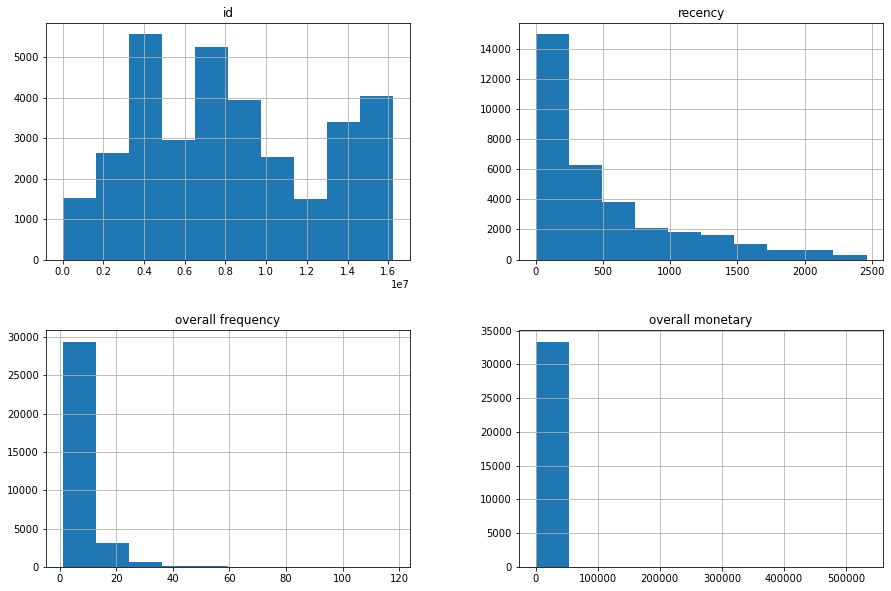%0A" class="jp-needs-light-background" />

# 3. Document the problem you will address using the SMART framework – use hypothetical data and goals for the improvement your Recommendation Engine will deliver<a href="#3.----Document-the-problem-you-will-address-using-the-SMART-framework-%E2%80%93-use-hypothetical-data-and-goals-for-the-improvement-your-Recommendation-Engine-will-deliver" class="anchor-link">¶</a>

SMART GOAL:

Specific: Increase the sales of books by Ecommerce website by 20% in the
US.

Measurable: Improve marketing performance to grow 15% of customer base
and increase the volume of orders by current customers 30%.

Actionable: Create a model that will help in creating segments of the
customers that use the ecommerce website so that they can be targeted
accordingly to increase sale of the totals book sold.

Relevant: The current system in place is helping drive sales but the new
model could potentially help better.

Timebound: Drive to improve sales by the end of 90 days.

# 4. Select from a pool of titles and roles within the company to create a core team (Maximum 6-8 members) to perform the analysis and develop the pitch to your CMO.<a href="#4.----Select-from-a-pool-of-titles-and-roles-within-the-company-to-create-a-core-team-(Maximum-6-8-members)-to-perform-the-analysis-and-develop-the-pitch-to-your-CMO." class="anchor-link">¶</a>

(Pool: VP Finance, Data Engineer, SVP Data Scientist, Financial Analyst,
Customer Satisfaction Manager, Website Analyst, Webmaster, VP Marketing,
Performance Marketing SEM/SEO Analyst, Customer Retention Manager,
Marketing Manager, Customer Research Analyst, Data Visualization
Specialist, Sr. Data Scientist, Marketing Analytics Manager, IT Manager
for Ecommerce Data Storage, Marketing Messaging/Creative Designer,
Ecommerce Financial Manager)

The following roles would be a part of the core team:

-   Customer Satisfaction Manager: To bring some domain knowledge about
    the ecommerce website; knows whether or not the customer is
    satisfied.

-   Performance Marketing SEM/SEO Analyst: To help generate innovative
    methods to create more traffic on the ecommerce website.

-   Sr. Data Scientist: To develop the new model for application.

-   Data Engineer: To help create the data pipeline for further analysis
    and model development.

-   Data Visualization Specialist: To create interpretable and
    interactive visualisations to analyze and present the data.

-   SVP Data Scientist: To lead the data science team, manage client
    needs with respect to time, and implement solutions to build the
    website.

# 5. Describe the team strengths and discipline focus areas that justify your need for each person and why this talent will be necessary for your success. This justification is intended to both motivate the team members and gain support from their managers to join your team.<a href="#5.----Describe-the-team-strengths-and-discipline-focus-areas-that-justify-your-need-for-each-person-and-why-this-talent-will-be-necessary-for-your-success.-This-justification-is-intended-to-both-motivate-the-team-members-and-gain-support-from-their-managers-to-join-your-team." class="anchor-link">¶</a>

The team strengths and focuses are mentioned above. Moreover, the team
will pursue a common outcome and have a common goal they want to reach
while they value one another’s contributions and skill sets.

# 6. Choose either a “supervised” or an “unsupervised” approach to segment/cluster current customers using the data provided.<a href="#6.-Choose-either-a-%E2%80%9Csupervised%E2%80%9D-or-an-%E2%80%9Cunsupervised%E2%80%9D-approach-to-segment/cluster-current-customers-using-the-data-provided." class="anchor-link">¶</a>

Customer Segments with RFM Model

The simplest way to create customers segments from RFM Model is to use
Quartiles. We assign a score from 1 to 4 to Recency, Frequency and
Monetary. Four is the best/highest value, and one is the lowest/worst
value. A final RFM score is calculated simply by combining individual
RFM score numbers.

Reference:
<https://www.kaggle.com/code/sarahm/customer-segmentation-using-rfm-analysis/notebook>

In \[18\]:

    quantiles = df_rmf1.quantile([0.25,0.5,0.75])
    quantiles

Out\[18\]:

|      | id         | recency | overall frequency | overall monetary |
|------|------------|---------|-------------------|------------------|
| 0.25 | 4382374.5  | 124.0   | 2.0               | 41.447250        |
| 0.50 | 7958528.0  | 299.0   | 3.0               | 104.379211       |
| 0.75 | 11982377.0 | 725.0   | 7.0               | 249.839966       |

In \[19\]:

    quantiles.to_dict()

Out\[19\]:

    {'id': {0.25: 4382374.5, 0.5: 7958528.0, 0.75: 11982377.0},
     'recency': {0.25: 124.0, 0.5: 299.0, 0.75: 725.0},
     'overall frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 7.0},
     'overall monetary': {0.25: 41.447250366,
      0.5: 104.37921143,
      0.75: 249.83996581999997}}

We will create two segmentation classes since, high recency is bad,
while high frequency and monetary value is good.

In \[20\]:

    # Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
    def RScore(x,p,d):
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.50]:
            return 3
        elif x <= d[p][0.75]: 
            return 2
        else:
            return 1
    # Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
    def FMScore(x,p,d):
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.50]:
            return 2
        elif x <= d[p][0.75]: 
            return 3
        else:
            return 4

In \[21\]:

    #create rfm segmentation table
    rfm_segmentation = df_rmf1
    rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
    rfm_segmentation['F_Quartile'] = rfm_segmentation['overall frequency'].apply(FMScore, args=('overall frequency',quantiles,))
    rfm_segmentation['M_Quartile'] = rfm_segmentation['overall monetary'].apply(FMScore, args=('overall monetary',quantiles,))

In \[22\]:

    rfm_segmentation.head()

Out\[22\]:

|     | id   | recency | overall frequency | overall monetary | R_Quartile | F_Quartile | M_Quartile |
|-----|------|---------|-------------------|------------------|------------|------------|------------|
| 0   | 914  | 194     | 7                 | 318.894775       | 3          | 3          | 4          |
| 1   | 957  | 3       | 14                | 368.052246       | 4          | 4          | 4          |
| 2   | 1406 | 1489    | 15                | 423.298340       | 1          | 4          | 4          |
| 3   | 1414 | 155     | 4                 | 71.217041        | 3          | 3          | 2          |
| 4   | 1546 | 194     | 6                 | 442.638184       | 3          | 3          | 4          |

In \[23\]:

    rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                                + rfm_segmentation.F_Quartile.map(str) \
                                + rfm_segmentation.M_Quartile.map(str)
    rfm_segmentation.head()

Out\[23\]:

|     | id   | recency | overall frequency | overall monetary | R_Quartile | F_Quartile | M_Quartile | RFMScore |
|-----|------|---------|-------------------|------------------|------------|------------|------------|----------|
| 0   | 914  | 194     | 7                 | 318.894775       | 3          | 3          | 4          | 334      |
| 1   | 957  | 3       | 14                | 368.052246       | 4          | 4          | 4          | 444      |
| 2   | 1406 | 1489    | 15                | 423.298340       | 1          | 4          | 4          | 144      |
| 3   | 1414 | 155     | 4                 | 71.217041        | 3          | 3          | 2          | 332      |
| 4   | 1546 | 194     | 6                 | 442.638184       | 3          | 3          | 4          | 334      |

In \[24\]:

    #find the best customers
    rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('overall monetary', ascending=False).head()

Out\[24\]:

|       | id       | recency | overall frequency | overall monetary | R_Quartile | F_Quartile | M_Quartile | RFMScore |
|-------|----------|---------|-------------------|------------------|------------|------------|------------|----------|
| 9044  | 5900190  | 69      | 11                | 532892.000000    | 4          | 4          | 4          | 444      |
| 13833 | 8192553  | 23      | 31                | 147684.875000    | 4          | 4          | 4          | 444      |
| 21167 | 13729756 | 16      | 118               | 18582.531250     | 4          | 4          | 4          | 444      |
| 7478  | 4980476  | 25      | 38                | 10073.937500     | 4          | 4          | 4          | 444      |
| 2538  | 2901870  | 34      | 110               | 9446.015625      | 4          | 4          | 4          | 444      |

In \[25\]:

    #Calcuate the number of cusomters in each segment:
    print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
    print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
    print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
    print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
    print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
    print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

    Best Customers:  2734
    Loyal Customers:  8282
    Big Spenders:  8339
    Almost Lost:  1366
    Lost Customers:  553
    Lost Cheap Customers:  2194

Now we have different segements of customers and we can find approriate
methods to target each segment.

Here are some examples:

-   Best Customers: They will be the first group of people getting
    notified with new products and have early access to new products.

-   Loyal Customers: Frequent customers might receive a most popular
    suggestion from the same category of book as their current purchase
    without a discount.

-   Lost Cheap Customers: Infrequent customers might receive a
    discounted popular item to incentivize a purchase.

Create sample data (5-10 records) with synthetic data to show how a new
transaction will be scored and assigned to a segment/cluster.

In \[26\]:

    data = {'id':[1,2,3,4,5,6,7,8,9,10],
            'Recency':[20, 21, 19, 18, 12, 24, 48, 64, 56, 78],
            'Frequency':[128, 46, 100, 57, 69, 91, 21, 19, 47, 96],
            'Monetary':[2468, 135, 77, 128, 3102, 2577, 408, 124, 99, 55]}

    df = pd.DataFrame(data)
    df.head()

Out\[26\]:

|     | id  | Recency | Frequency | Monetary |
|-----|-----|---------|-----------|----------|
| 0   | 1   | 20      | 128       | 2468     |
| 1   | 2   | 21      | 46        | 135      |
| 2   | 3   | 19      | 100       | 77       |
| 3   | 4   | 18      | 57        | 128      |
| 4   | 5   | 12      | 69        | 3102     |

In \[27\]:

    quantiles_df = df.quantile([0.25,0.5,0.75])
    quantiles_df.head()

Out\[27\]:

|      | id   | Recency | Frequency | Monetary |
|------|------|---------|-----------|----------|
| 0.25 | 3.25 | 19.25   | 46.25     | 105.25   |
| 0.50 | 5.50 | 22.50   | 63.00     | 131.50   |
| 0.75 | 7.75 | 54.00   | 94.75     | 1953.00  |

In \[28\]:

    rfm_segmentation_df = df
    rfm_segmentation_df['R_Quartile'] = rfm_segmentation_df['Recency'].apply(RScore, args=('Recency',quantiles_df,))
    rfm_segmentation_df['F_Quartile'] = rfm_segmentation_df['Frequency'].apply(FMScore, args=('Frequency',quantiles_df,))
    rfm_segmentation_df['M_Quartile'] = rfm_segmentation_df['Monetary'].apply(FMScore, args=('Monetary',quantiles_df,))

In \[29\]:

    rfm_segmentation_df['RFMScore'] = rfm_segmentation_df.R_Quartile.map(str) \
                                + rfm_segmentation_df.F_Quartile.map(str) \
                                + rfm_segmentation_df.M_Quartile.map(str)
    rfm_segmentation_df

Out\[29\]:

|     | id  | Recency | Frequency | Monetary | R_Quartile | F_Quartile | M_Quartile | RFMScore |
|-----|-----|---------|-----------|----------|------------|------------|------------|----------|
| 0   | 1   | 20      | 128       | 2468     | 3          | 4          | 4          | 344      |
| 1   | 2   | 21      | 46        | 135      | 3          | 1          | 3          | 313      |
| 2   | 3   | 19      | 100       | 77       | 4          | 4          | 1          | 441      |
| 3   | 4   | 18      | 57        | 128      | 4          | 2          | 2          | 422      |
| 4   | 5   | 12      | 69        | 3102     | 4          | 3          | 4          | 434      |
| 5   | 6   | 24      | 91        | 2577     | 2          | 3          | 4          | 234      |
| 6   | 7   | 48      | 21        | 408      | 2          | 1          | 3          | 213      |
| 7   | 8   | 64      | 19        | 124      | 1          | 1          | 2          | 112      |
| 8   | 9   | 56      | 47        | 99       | 1          | 2          | 1          | 121      |
| 9   | 10  | 78      | 96        | 55       | 1          | 4          | 1          | 141      |

In \[30\]:

    rfm_segmentation_df.sort_values('Monetary', ascending=False).head()

Out\[30\]:

|     | id  | Recency | Frequency | Monetary | R_Quartile | F_Quartile | M_Quartile | RFMScore |
|-----|-----|---------|-----------|----------|------------|------------|------------|----------|
| 4   | 5   | 12      | 69        | 3102     | 4          | 3          | 4          | 434      |
| 5   | 6   | 24      | 91        | 2577     | 2          | 3          | 4          | 234      |
| 0   | 1   | 20      | 128       | 2468     | 3          | 4          | 4          | 344      |
| 6   | 7   | 48      | 21        | 408      | 2          | 1          | 3          | 213      |
| 1   | 2   | 21      | 46        | 135      | 3          | 1          | 3          | 313      |

In \[31\]:

    print("Best Customers: ",len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='434']))
    print('Loyal Customers: ',len(rfm_segmentation_df[rfm_segmentation_df['F_Quartile']==4]))
    print("Big Spenders: ",len(rfm_segmentation_df[rfm_segmentation_df['M_Quartile']==4]))
    print('Almost Lost: ', len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='244']))
    print('Lost Customers: ',len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='121']))
    print('Lost Cheap Customers: ',len(rfm_segmentation_df[rfm_segmentation_df['RFMScore']=='141']))

    Best Customers:  1
    Loyal Customers:  3
    Big Spenders:  3
    Almost Lost:  0
    Lost Customers:  1
    Lost Cheap Customers:  1

In \[32\]:

    rfm_segmentation_df['Segmentation'] = 0

    rfm_segmentation_df['Segmentation'][rfm_segmentation_df['F_Quartile']==4] = 'Loyal Customers'
    rfm_segmentation_df['Segmentation'][rfm_segmentation_df['M_Quartile']==4] = 'Big Spenders'
    rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='434'] = 'Best Customers'

    rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='244'] = 'Almost Lost'
    rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='121'] = 'Lost Customers'
    rfm_segmentation_df['Segmentation'][rfm_segmentation_df['RFMScore']=='141'] = 'Lost Cheap Customers'

In \[33\]:

    rfm_segmentation_df.head()

Out\[33\]:

|     | id  | Recency | Frequency | Monetary | R_Quartile | F_Quartile | M_Quartile | RFMScore | Segmentation    |
|-----|-----|---------|-----------|----------|------------|------------|------------|----------|-----------------|
| 0   | 1   | 20      | 128       | 2468     | 3          | 4          | 4          | 344      | Big Spenders    |
| 1   | 2   | 21      | 46        | 135      | 3          | 1          | 3          | 313      | 0               |
| 2   | 3   | 19      | 100       | 77       | 4          | 4          | 1          | 441      | Loyal Customers |
| 3   | 4   | 18      | 57        | 128      | 4          | 2          | 2          | 422      | 0               |
| 4   | 5   | 12      | 69        | 3102     | 4          | 3          | 4          | 434      | Best Customers  |

In \[ \]: